In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe"
pio.renderers.default = "notebook_connected"
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Read Data

In [2]:
df = pd.read_csv(r'retail_store_inventory.csv')

In [3]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [4]:
print("📅 Dataset Date Range:")
print("Start:", df['Date'].min())
print("End  :", df['Date'].max())

# Optional: unique days covered
print("📆 Unique Days:", df['Date'].nunique())


📅 Dataset Date Range:
Start: 2022-01-01
End  : 2024-01-01
📆 Unique Days: 731


In [5]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [9]:
print(df['Units Sold'])

0        127
1        150
2         65
3         61
4         14
        ... 
73095      8
73096     51
73097     36
73098    264
73099      6
Name: Units Sold, Length: 73100, dtype: int64


**Key Data Features** 
- Date : 
Daily records from [start_date] to [end_date].

- Store ID & Product ID : 
Unique identifiers for stores and products.

- Category : 
Product categories like Electronics, Clothing, Groceries, etc.

- Region : 
Geographic region of the store.

- Inventory Level : 
Stock available at the beginning of the day.

- Units Sold : 
Units sold during the day.

- Demand Forecast : 
Predicted demand based on past trends.

- Weather Condition : 
Daily weather impacting sales.

- Holiday/Promotion : 
Indicators for holidays or promotions.



# Exploring Data

--------MYYY ANALYSIS-------------------

 Replace "Category" with "Product ID" or "Region" for alternate groupings.

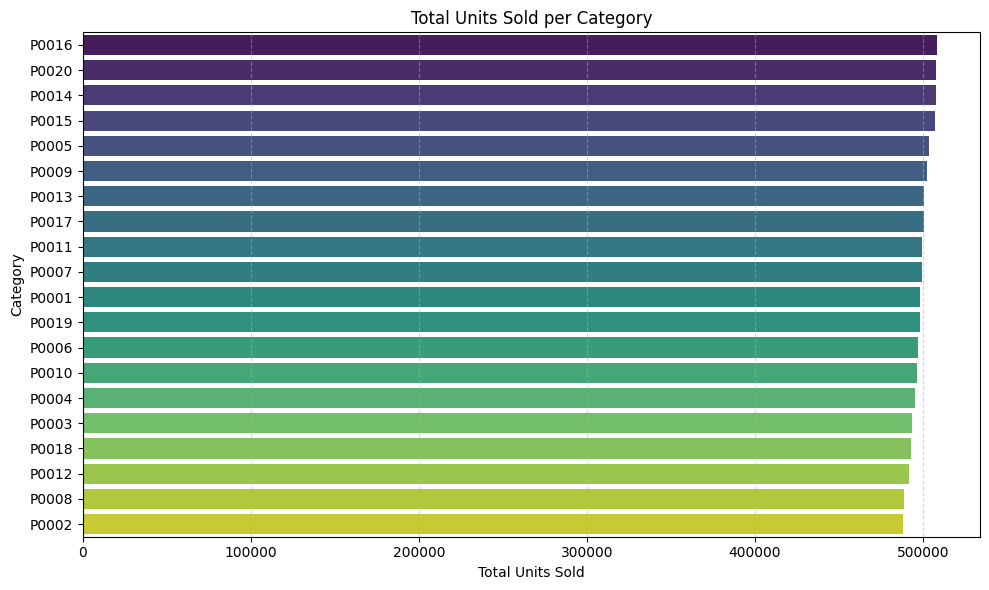

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Total units sold per Category
category_sales = df.groupby("Product ID" )["Units Sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")
plt.title("Total Units Sold per Category")
plt.xlabel("Total Units Sold")
plt.ylabel("Category")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


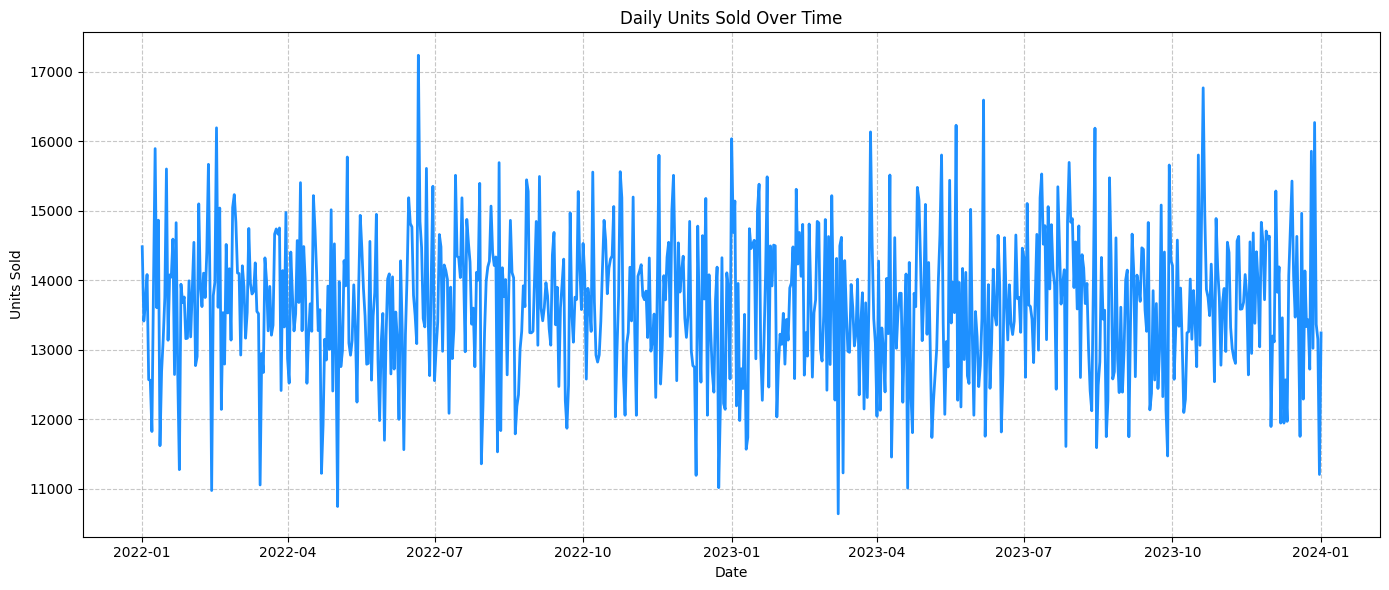

In [62]:
# Make sure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate daily sales
daily_sales = df.groupby("Date")["Units Sold"].sum()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values, color='dodgerblue', linewidth=2)
plt.title("Daily Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


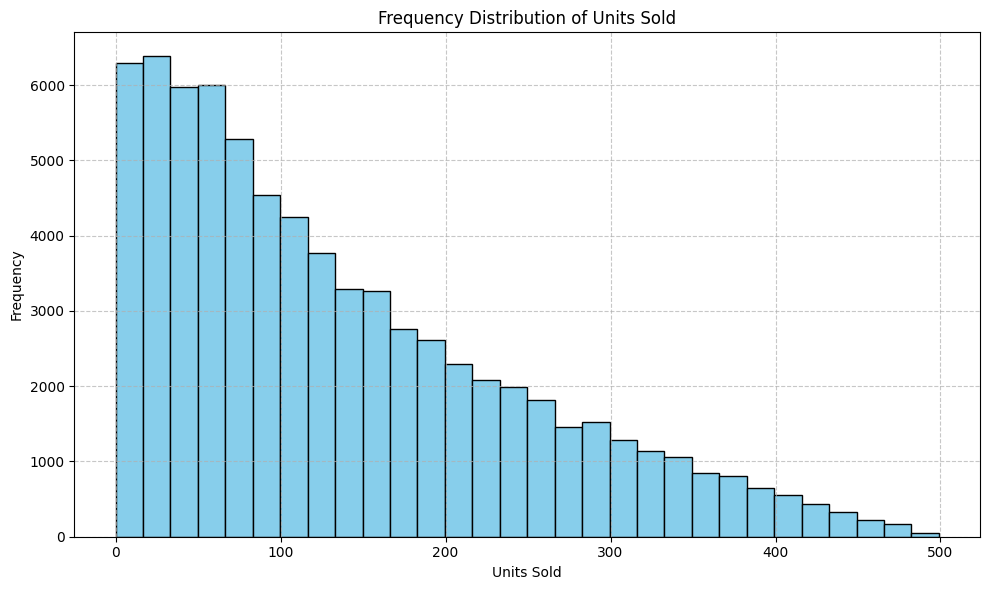

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Units Sold'], bins=30, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
# Total number of rows (for verification)
total_rows = len(df)

# Frequency count
freq_table = df['Units Sold'].value_counts().sort_index()

# Percentage distribution
percent_table = (freq_table / total_rows) * 100

# Combine into a clean DataFrame
distribution_table = pd.DataFrame({
    'Units Sold': freq_table.index,
    'Frequency': freq_table.values,
    'Percentage (%)': percent_table.values.round(2)
})

# Display the full table
print(distribution_table.to_string(index=False))

# Optional: Check total matches
print(f"\n✅ Total Rows = {total_rows} | Total Frequency = {freq_table.sum()} | Total Percentage = {percent_table.sum().round(2)}%")


 Units Sold  Frequency  Percentage (%)
          0        360            0.49
          1        407            0.56
          2        386            0.53
          3        369            0.50
          4        365            0.50
          5        359            0.49
          6        364            0.50
          7        369            0.50
          8        378            0.52
          9        331            0.45
         10        366            0.50
         11        385            0.53
         12        374            0.51
         13        376            0.51
         14        345            0.47
         15        373            0.51
         16        384            0.53
         17        390            0.53
         18        350            0.48
         19        377            0.52
         20        387            0.53
         21        380            0.52
         22        350            0.48
         23        363            0.50
         24        374   

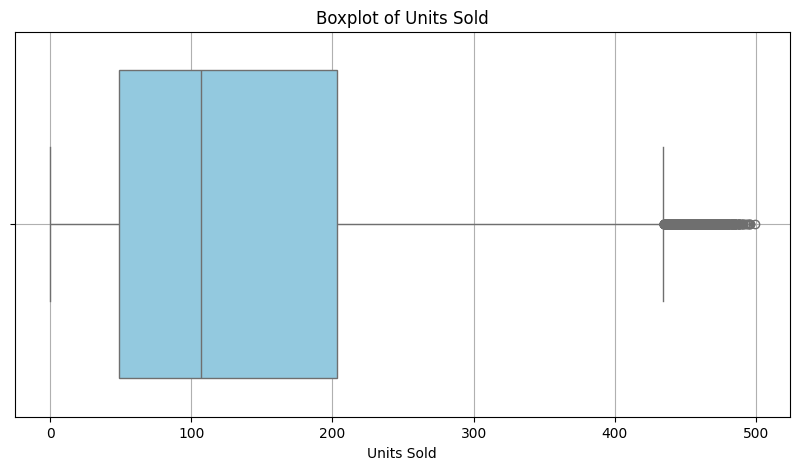

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Units Sold'], color='skyblue')
plt.title('Boxplot of Units Sold')
plt.grid(True)
plt.show()


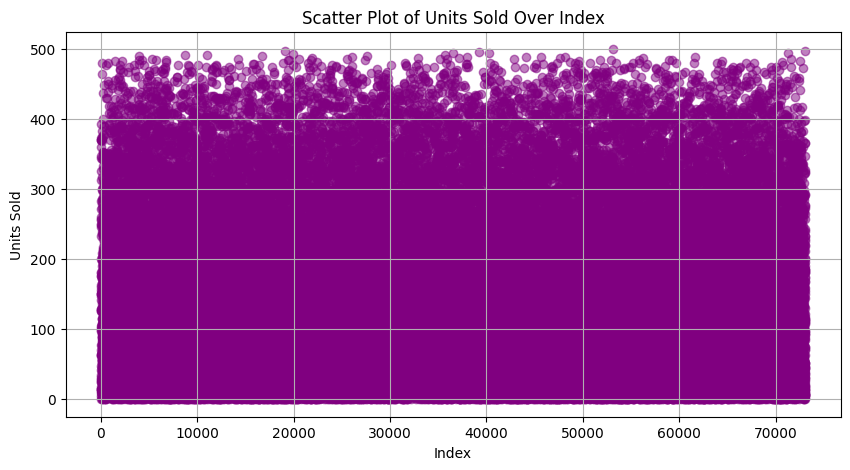

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['Units Sold'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Units Sold Over Index')
plt.ylabel('Units Sold')
plt.xlabel('Index')
plt.grid(True)
plt.show()


--------------------------------------

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [14]:
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

**Drop Unneeded Columns & Rename Columns**

In [16]:
df.drop(columns=['Date', 'Store ID', 'Product ID'], axis=1, inplace=True)

In [17]:
df = df.rename(columns={'Inventory Level': 'Inventory', 
                        'Units Sold': 'Sales', 
                        'Units Ordered': 'Orders', 
                        'Demand Forecast': 'Demand', 
                        'Weather Condition': 'Weather', 
                        'Holiday/Promotion': 'Promotion', 
                        'Competitor Pricing': 'Competitor Price'})

**Box Plots for Numarical Columns**

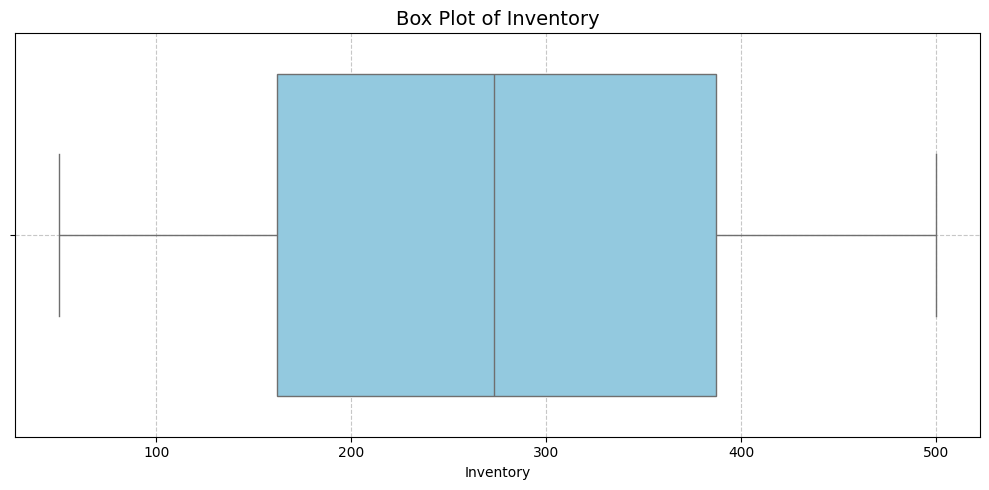

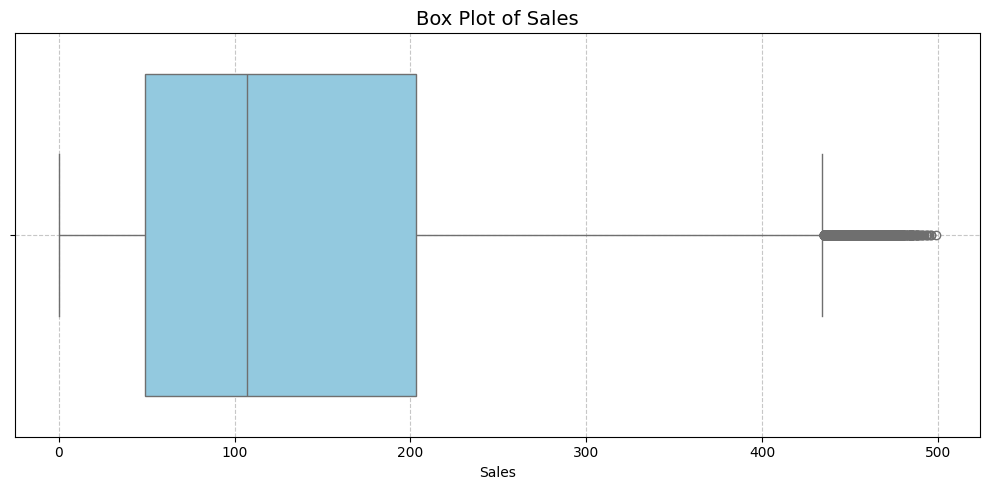

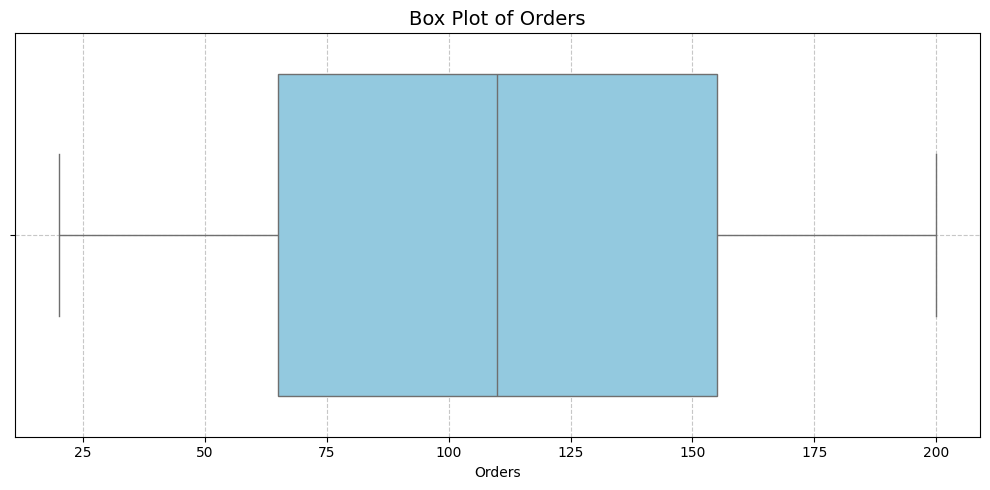

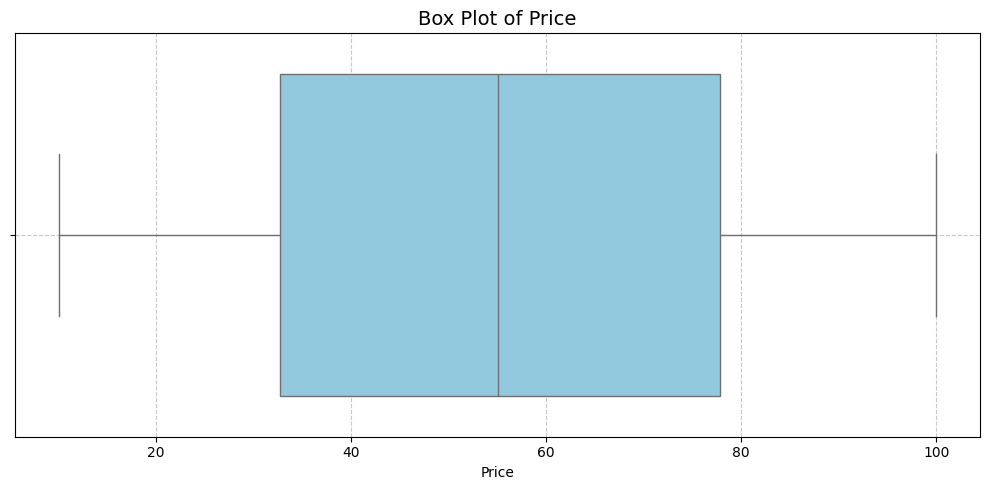

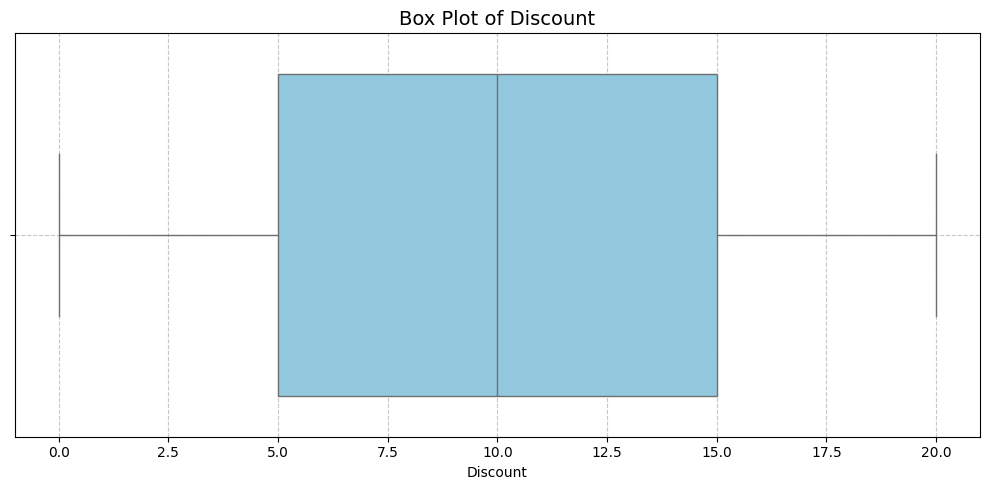

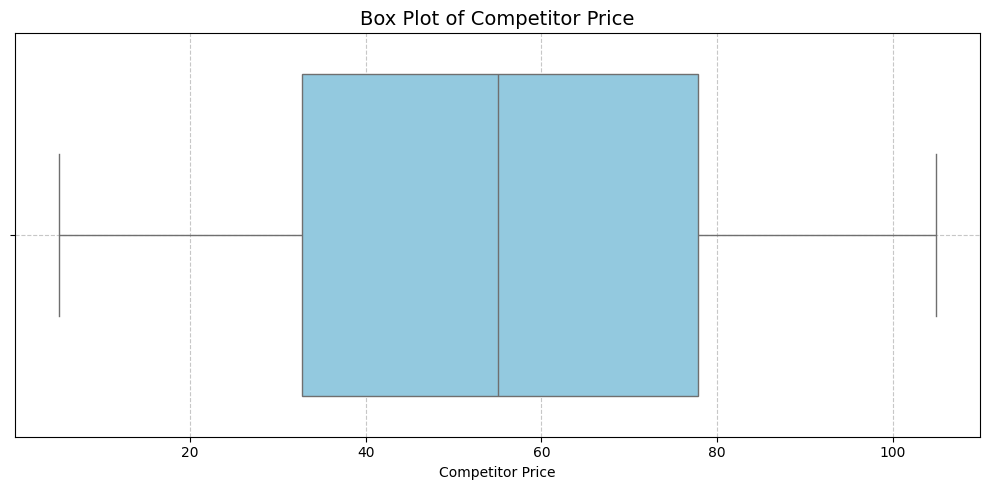

In [14]:
numarical_columns = ['Inventory', 'Sales', 'Orders', 'Price', 'Discount', 'Competitor Price']

for col in numarical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Box Plot of {col}", fontsize=14)
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

- **Inventory**: The median inventory level is around 200, with a range of 100 to 500. There are some outliers with inventory levels above 500, indicating potential stockpiling or overstocking.

- **Sales**: The median sales are around 100, with a range of 50 to 200. There are some outliers with sales above 200, indicating high demand or promotional activities.

- **Orders**: The median orders are around 100, with a range of 50 to 200. Similar to sales, there are outliers with orders above 200, indicating high demand or restocking.

- **Price**: The median price is around 30, with a range of 10 to 70. There are outliers with prices above 70, indicating premium products or high-margin items.

- **Discount**: The median discount is around 10%, with a range of 0 to 20%. There are outliers with discounts above 20%, indicating aggressive pricing strategies or clearance sales.

- **Competitor Price**: The median competitor price is around 30, with a range of 20 to 60. There are outliers with competitor prices above 60, indicating high competition or premium products.





# Exploratory Data Analysis (EDA)

## Univariate Analysis

**1-Category**

In [15]:
CategoryCounts = df['Category'].value_counts().reset_index()
CategoryCounts

,Category,count
0,Furniture,14699
1,Toys,14643
2,Clothing,14626
3,Groceries,14611
4,Electronics,14521


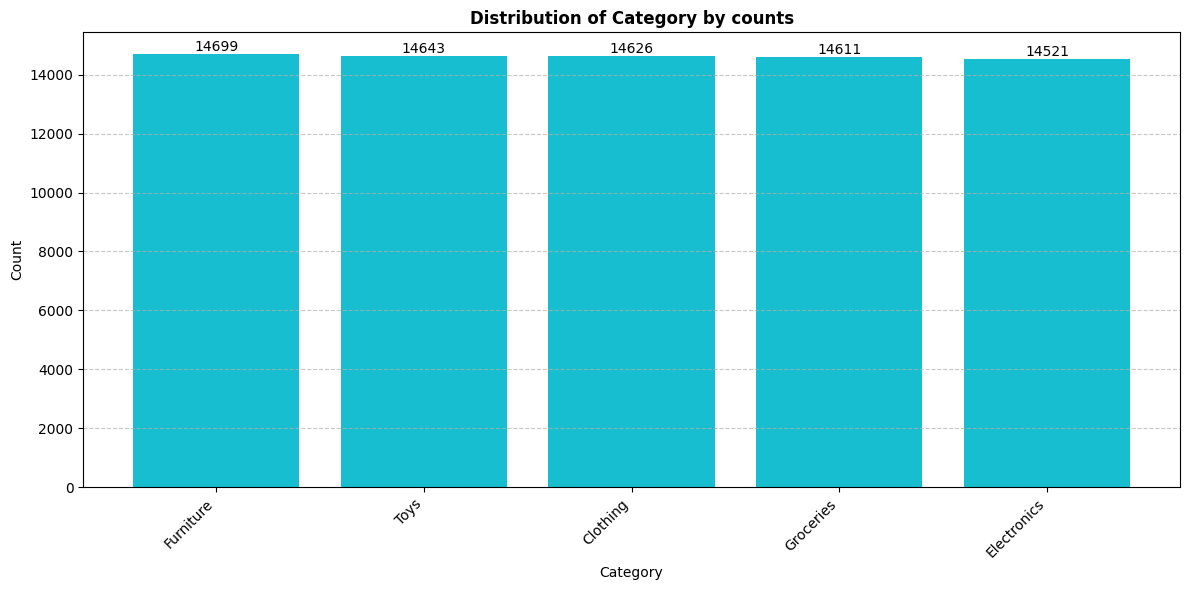

In [17]:
plt.figure(figsize=(12, 6))
bars = plt.bar(CategoryCounts['Category'], CategoryCounts['count'], color='#17becf')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Distribution of Category by counts', fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**2-Region**

In [18]:
RegionCounts = df['Region'].value_counts().reset_index()
RegionCounts

,Region,count
0,East,18349
1,South,18297
2,North,18228
3,West,18226


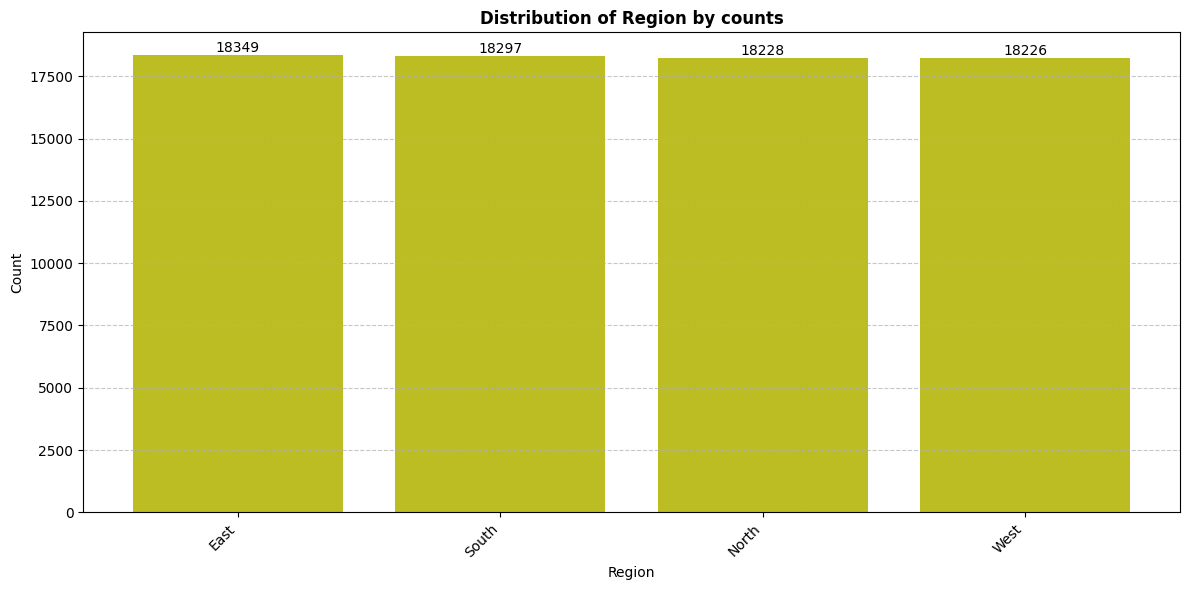

In [19]:
# Assuming RegionCounts has columns: 'Region' and 'count'
plt.figure(figsize=(12, 6))  # Width = 1000 pixels / 100 = 10 inches, height adjusted accordingly

bars = plt.bar(RegionCounts['Region'], RegionCounts['count'], color='#bcbd22')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Distribution of Region by counts', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**3-Inventory**

In [20]:
InventoryDes = df['Inventory'].describe()
InventoryDes

count    73100.000000
mean       274.469877
std        129.949514
min         50.000000
25%        162.000000
50%        273.000000
75%        387.000000
max        500.000000
Name: Inventory, dtype: float64

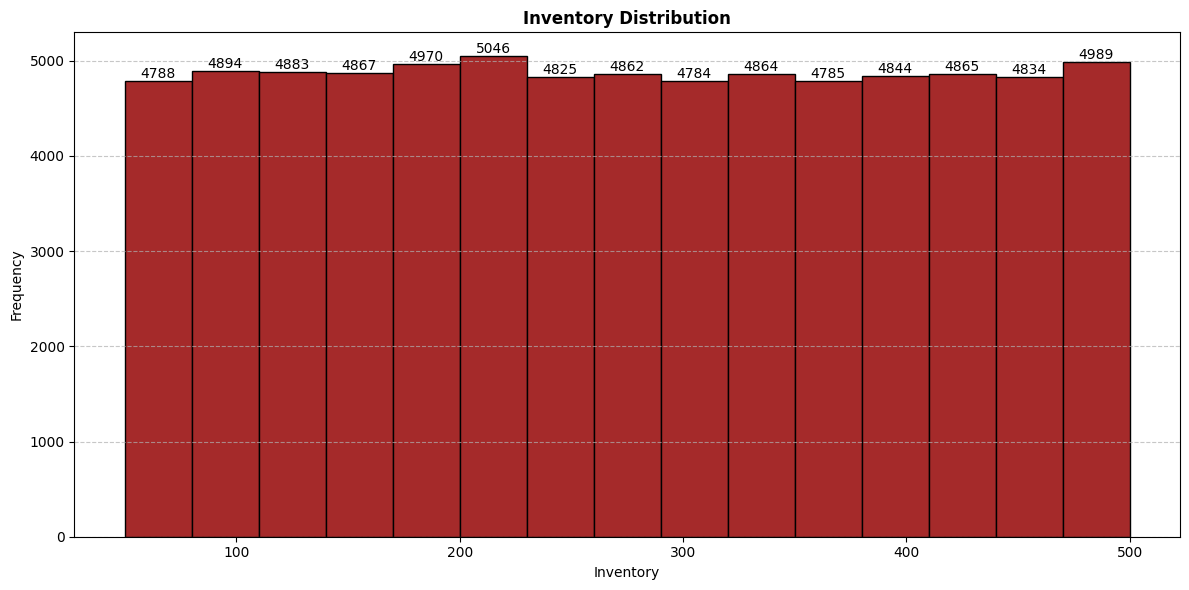

In [21]:
# Create the histogram
plt.figure(figsize=(12, 6))  # Width 1000px ≈ 12 inches
counts, bins, patches = plt.hist(df['Inventory'], bins=15, color='brown', edgecolor='black')

# Add text labels on top of bars
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text((bin_left + bin_right) / 2, count, f'{int(count)}',
             ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Inventory Distribution', fontweight='bold')
plt.xlabel('Inventory')
plt.ylabel('Frequency')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**4-Sales**

In [18]:
SalesDes = df['Sales'].describe()
SalesDes

count    73100.000000
mean       136.464870
std        108.919406
min          0.000000
25%         49.000000
50%        107.000000
75%        203.000000
max        499.000000
Name: Sales, dtype: float64

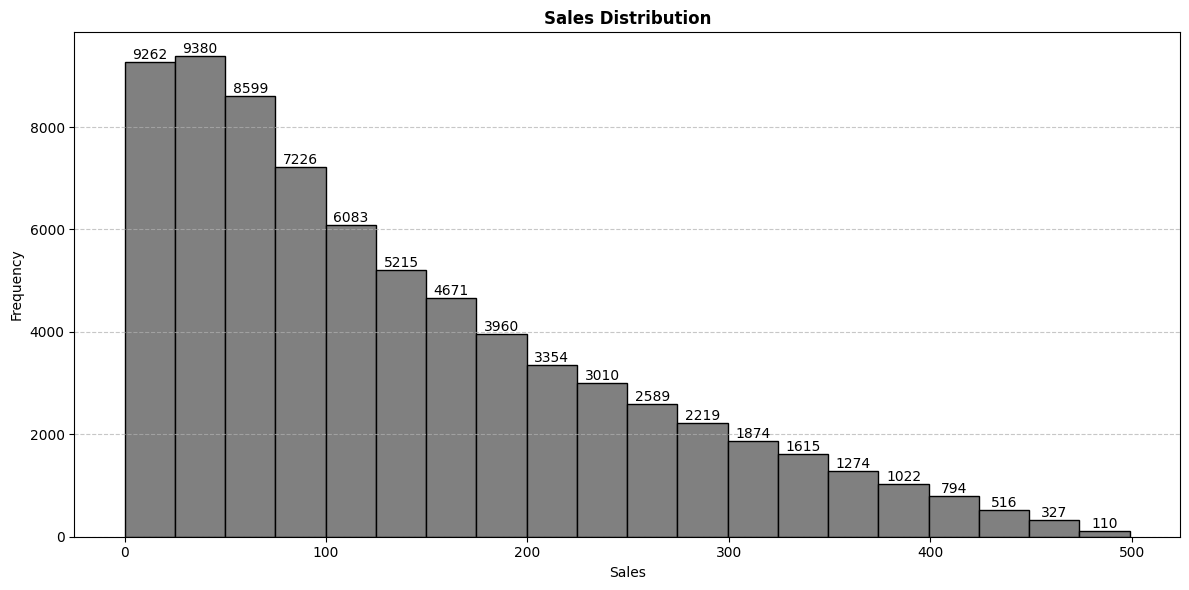

In [23]:
# Create the histogram
plt.figure(figsize=(12, 6))  # 1000 px ≈ 12 inches
counts, bins, patches = plt.hist(df['Sales'], bins=20, color='grey', edgecolor='black')

# Add text labels on top of bars
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text((bin_left + bin_right) / 2, count, f'{int(count)}',
             ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Sales Distribution', fontweight='bold')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Add horizontal grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

 - The average sales per item is around 136 units, with a standard deviation of 109 units.
 - The minimum sales per item is 0 units, indicating that some items did not sell at all.
 - The maximum sales per item is 499 units, indicating a high demand for certain items.
 - The median sales per item is 107 units, indicating that half of the items sold more than 107 units.
 - The 25th percentile of sales is 49 units, indicating that a quarter of the items sold less than 49 units.
 - The 75th percentile of sales is 203 units, indicating that a quarter of the items sold more than 203 units.



**5-Orders**

In [24]:
OrdersDes = df['Orders'].describe()
OrdersDes

count    73100.000000
mean       110.004473
std         52.277448
min         20.000000
25%         65.000000
50%        110.000000
75%        155.000000
max        200.000000
Name: Orders, dtype: float64

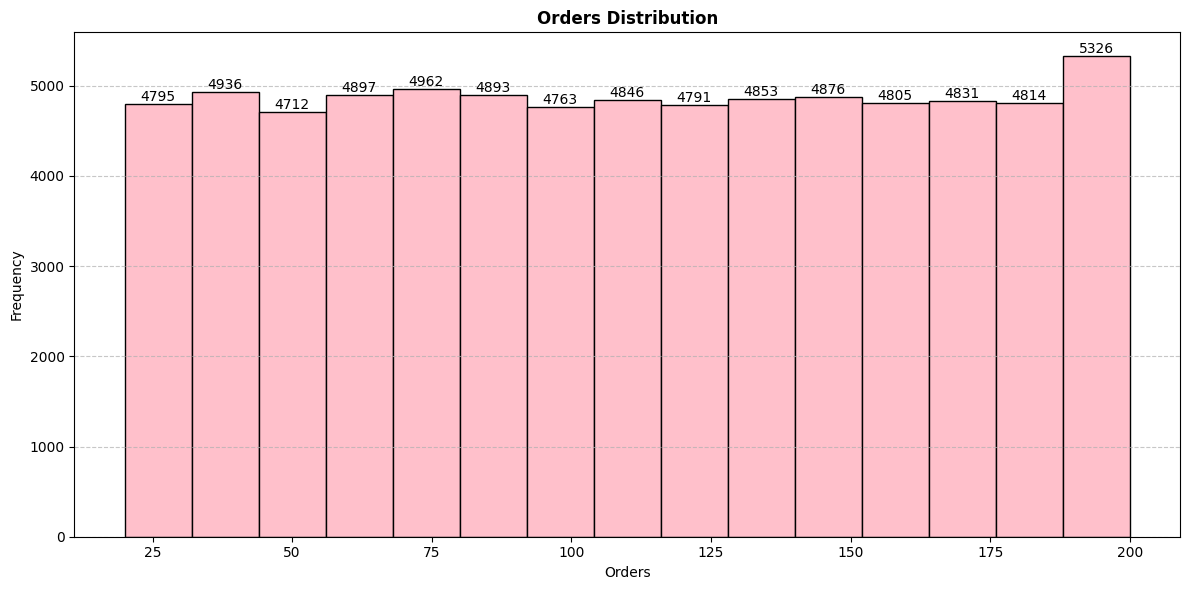

In [25]:
# Create the histogram
plt.figure(figsize=(12, 6))  # 1000px ≈ 12 inches wide
counts, bins, patches = plt.hist(df['Orders'], bins=15, color='pink', edgecolor='black')

# Add count labels on top of each bar
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text((bin_left + bin_right) / 2, count, f'{int(count)}',
             ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Orders Distribution', fontweight='bold')
plt.xlabel('Orders')
plt.ylabel('Frequency')

# Add y-axis grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**6-Demand**

In [26]:
DemandDes = df['Demand'].describe()
DemandDes

count    73100.000000
mean       141.494720
std        109.254076
min         -9.990000
25%         53.670000
50%        113.015000
75%        208.052500
max        518.550000
Name: Demand, dtype: float64

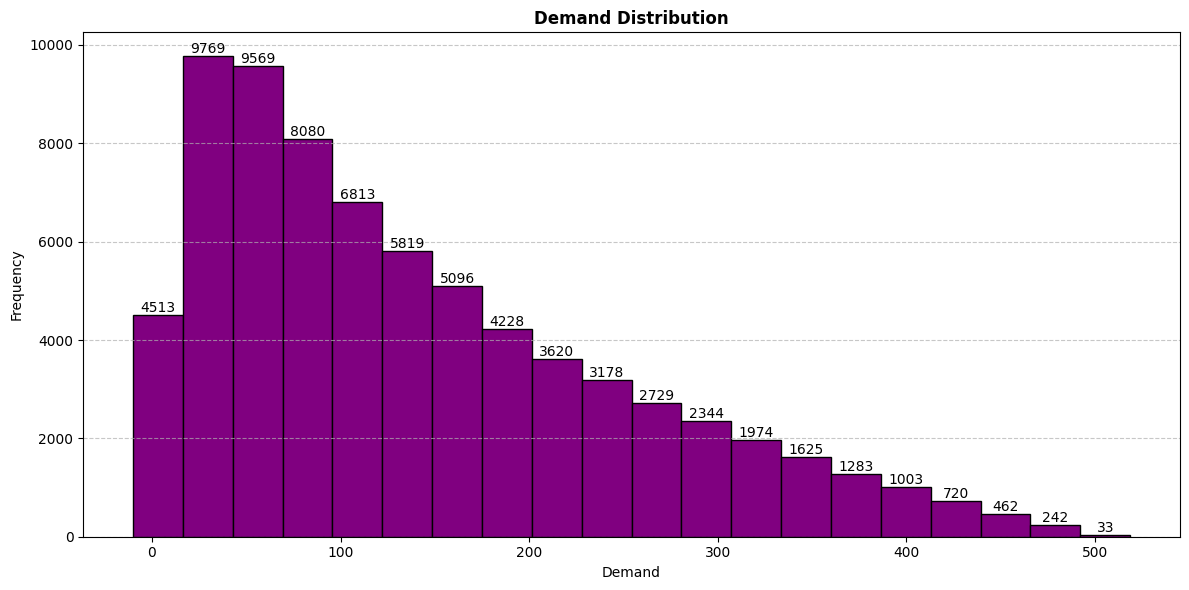

In [27]:

# Create the histogram
plt.figure(figsize=(12, 6))  # Width ~1000px
counts, bins, patches = plt.hist(df['Demand'], bins=20, color='purple', edgecolor='black')

# Add count labels on top of each bar
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text((bin_left + bin_right) / 2, count, f'{int(count)}',
             ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Demand Distribution', fontweight='bold')
plt.xlabel('Demand')
plt.ylabel('Frequency')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


From the DemandDes statistics, we can observe the following insights:

1. **Mean Demand**: The average demand is around 141.49 units, indicating a moderate level of demand.
2. **Standard Deviation**: The standard deviation of demand is 109.25 units, indicating a significant variation in demand.
3. **Minimum Demand**: The minimum demand is -9.99 units, which might indicate errors in data collection or unusual circumstances.
4. **Maximum Demand**: The maximum demand is 518.55 units, indicating a high demand scenario.
5. **Quartiles**: The 25th percentile is 53.67 units, the median is 113.02 units, and the 75th percentile is 208.05 units, indicating a skewed distribution with a long tail towards higher demand.

The histogram fig of Demand provides a visual representation of the demand distribution. From the histogram, we can infer:

1. **Skewed Distribution**: The demand distribution is skewed to the right, indicating that there are more instances of higher demand.
2. **Peak Demand**: The histogram shows a peak around the median demand (113.02 units), indicating that most of the demand is concentrated around this value.
3. **Variation in Demand**: The histogram also shows a significant variation in demand, with some instances of very high demand (above 400 units) and some instances of low demand (below 50 units).



**7-Price**

In [29]:
PriceDes = df['Price'].describe()
PriceDes

count    73100.000000
mean        55.135108
std         26.021945
min         10.000000
25%         32.650000
50%         55.050000
75%         77.860000
max        100.000000
Name: Price, dtype: float64

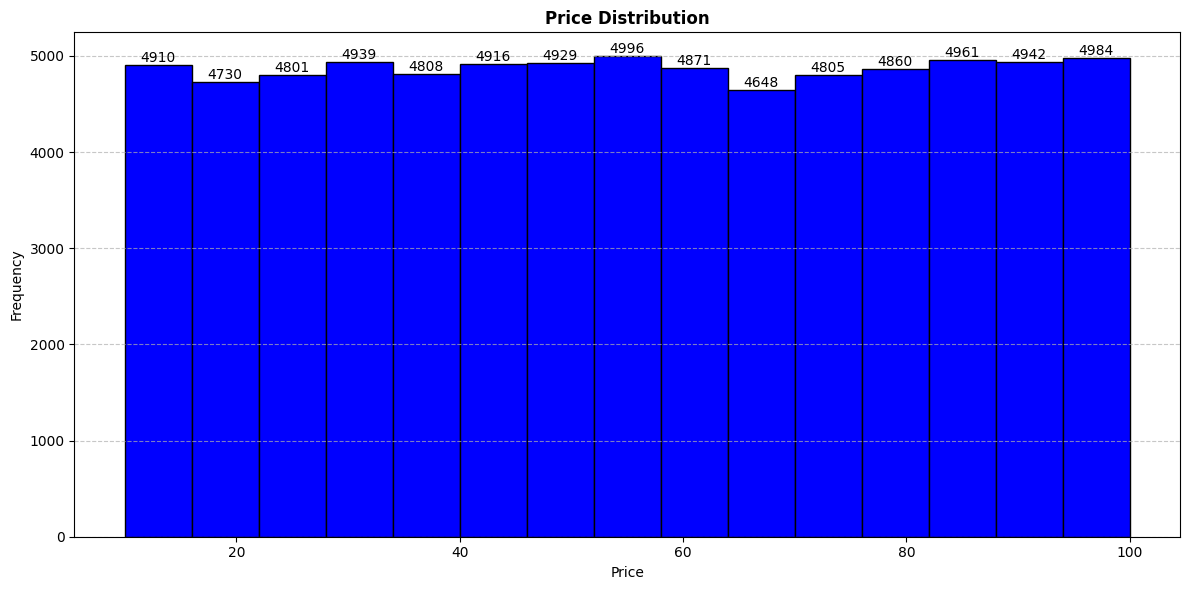

In [31]:

# Create the histogram
plt.figure(figsize=(12, 6))  # Approximate width of 1000px
counts, bins, patches = plt.hist(df['Price'], bins=15, color='blue', edgecolor='black')

# Add count labels on top of each bar
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text((bin_left + bin_right) / 2, count, f'{int(count)}',
             ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Price Distribution', fontweight='bold')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**8-Discount**

In [32]:
DiscountCounts = df['Discount'].value_counts().reset_index()
DiscountCounts

,Discount,count
0,20,14715
1,0,14662
2,15,14624
3,5,14591
4,10,14508


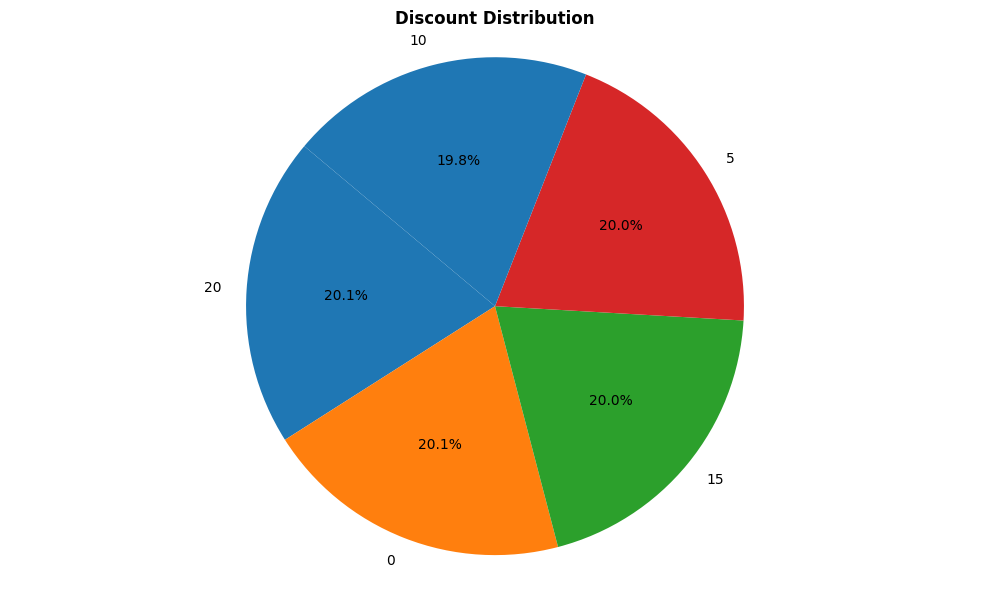

In [34]:

labels = DiscountCounts['Discount']
sizes = DiscountCounts['count']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(10, 6))  # Width ≈ 1000px

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures pie is a circle
plt.axis('equal')

# Title
plt.title('Discount Distribution', fontweight='bold')

plt.tight_layout()
plt.show()


**9-Weather**

In [33]:
WeatherCounts = df['Weather'].value_counts().reset_index()
WeatherCounts

,Weather,count
0,Sunny,18290
1,Rainy,18278
2,Snowy,18272
3,Cloudy,18260


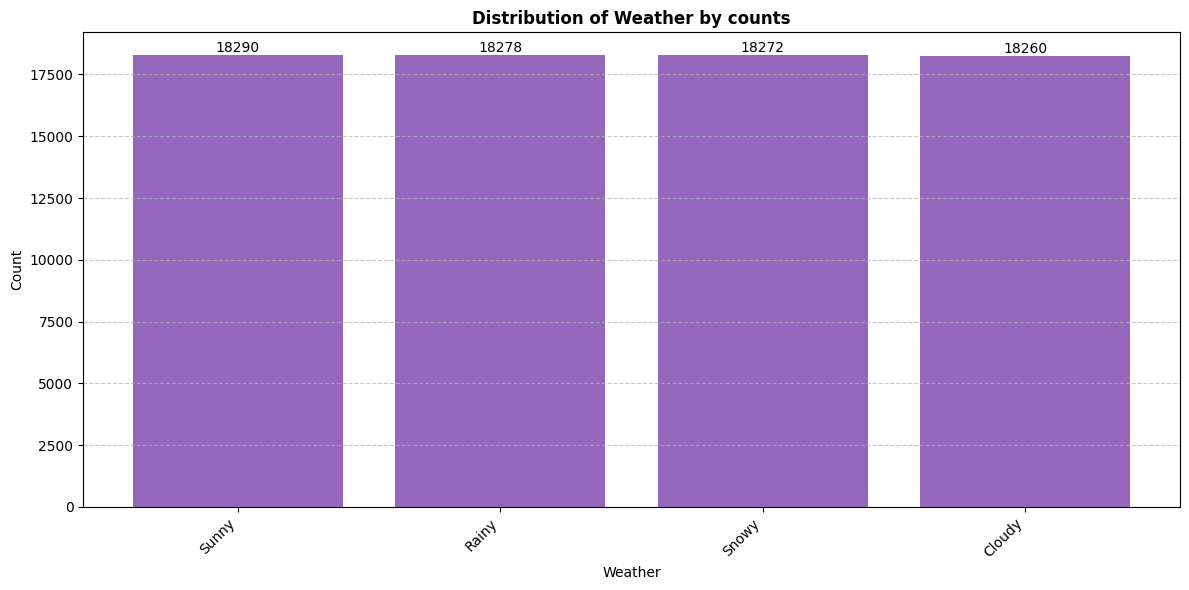

In [36]:

# Assuming WeatherCounts has columns: 'Weather' and 'count'
plt.figure(figsize=(12, 6))  # 1000px ≈ 12 inches wide
bars = plt.bar(WeatherCounts['Weather'], WeatherCounts['count'], color='#9467bd')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Distribution of Weather by counts', fontweight='bold')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate for readability

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**10-Promotion**

In [35]:
PromotionCounts = df['Promotion'].value_counts().reset_index()
PromotionCounts

,Promotion,count
0,0,36747
1,1,36353


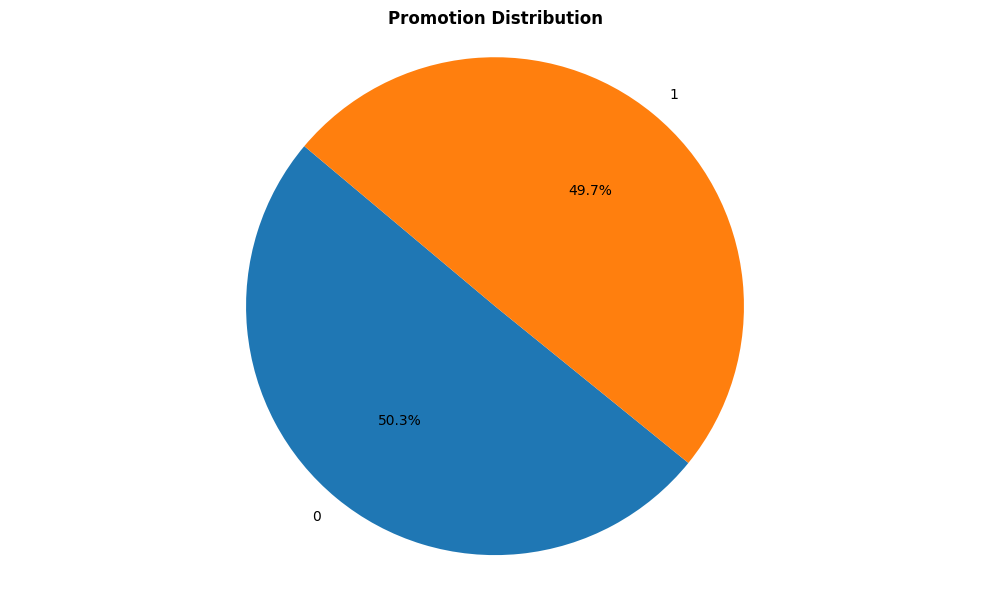

In [37]:

labels = PromotionCounts['Promotion']
sizes = PromotionCounts['count']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(10, 6))  # ~1000px width

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Ensure the pie is a circle
plt.axis('equal')

# Title
plt.title('Promotion Distribution', fontweight='bold')

plt.tight_layout()
plt.show()


**11-Competitor Price**

In [38]:
CompetitorPriceDes = df['Competitor Price'].describe()
CompetitorPriceDes

count    73100.000000
mean        55.146077
std         26.191408
min          5.030000
25%         32.680000
50%         55.010000
75%         77.820000
max        104.940000
Name: Competitor Price, dtype: float64

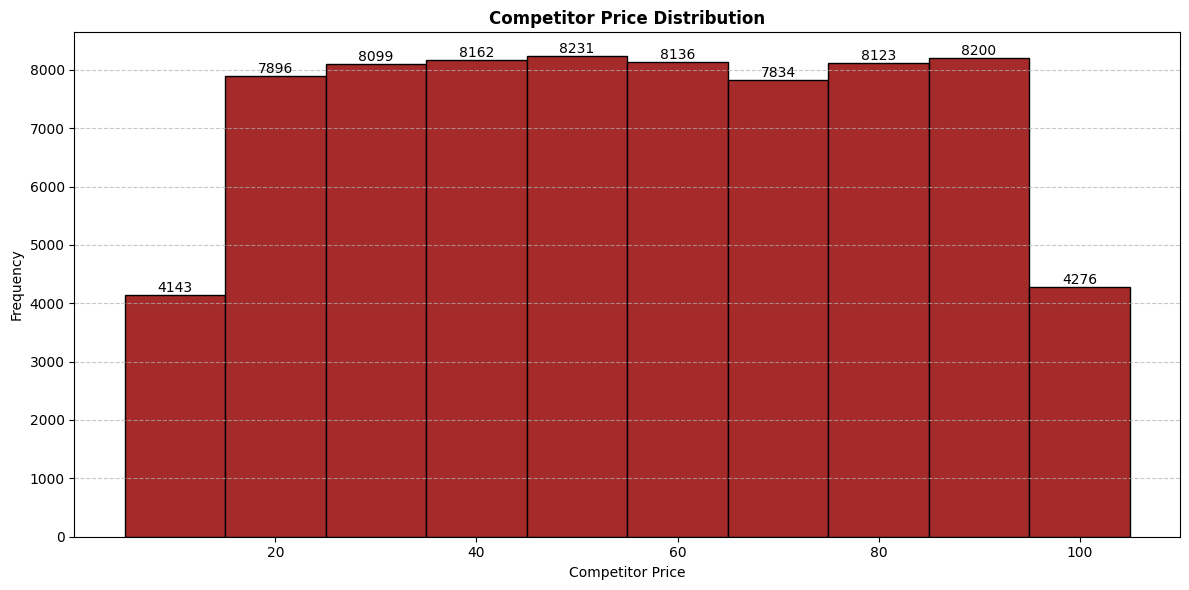

In [40]:

# Create the histogram
plt.figure(figsize=(12, 6))  # ~1000px width
counts, bins, patches = plt.hist(df['Competitor Price'], bins=10, color='brown', edgecolor='black')

# Add count labels on top of each bar
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text((bin_left + bin_right) / 2, count, f'{int(count)}',
             ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Competitor Price Distribution', fontweight='bold')
plt.xlabel('Competitor Price')
plt.ylabel('Frequency')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**12-Seasonality**

In [39]:
SeasonalityCounts = df['Seasonality'].value_counts().reset_index()
SeasonalityCounts

,Seasonality,count
0,Spring,18317
1,Summer,18305
2,Winter,18285
3,Autumn,18193


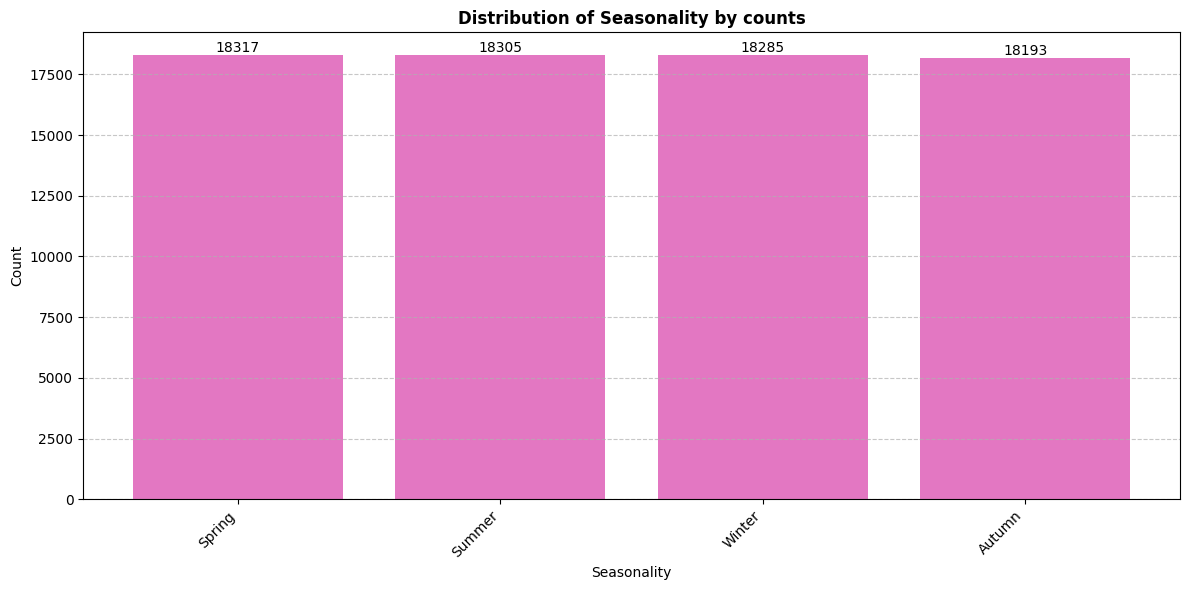

In [41]:

# Assuming SeasonalityCounts has columns: 'Seasonality' and 'count'
plt.figure(figsize=(12, 6))  # 1000px ≈ 12 inches wide
bars = plt.bar(SeasonalityCounts['Seasonality'], SeasonalityCounts['count'], color='#e377c2')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Distribution of Seasonality by counts', fontweight='bold')
plt.xlabel('Seasonality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate for readability if needed

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Bivariate Analysis

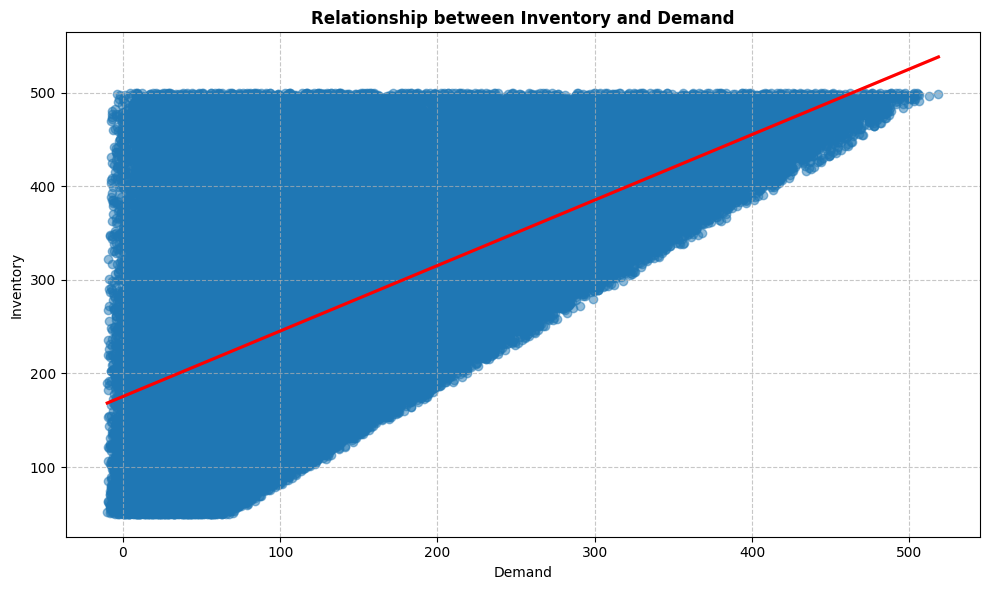

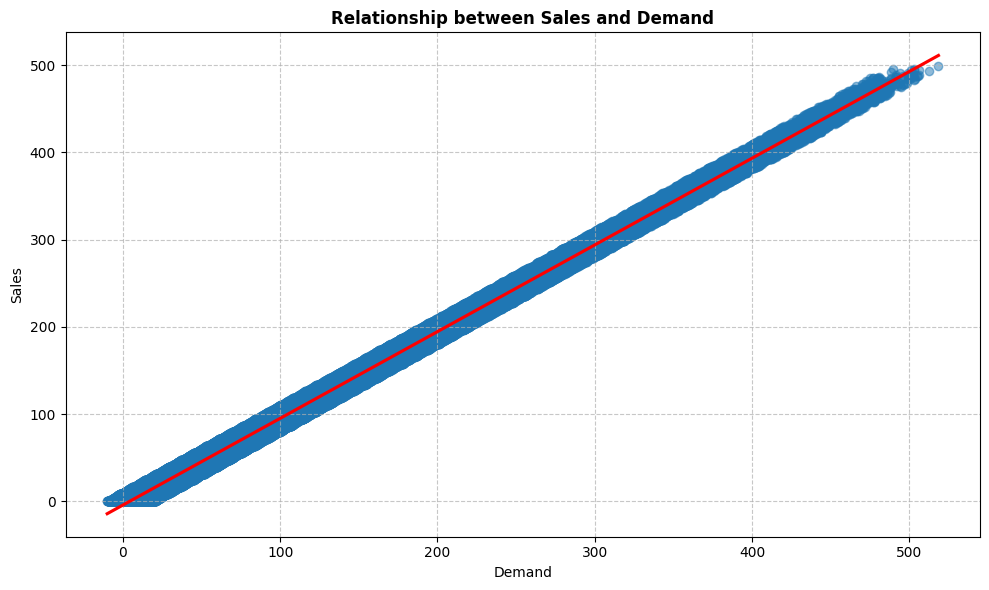

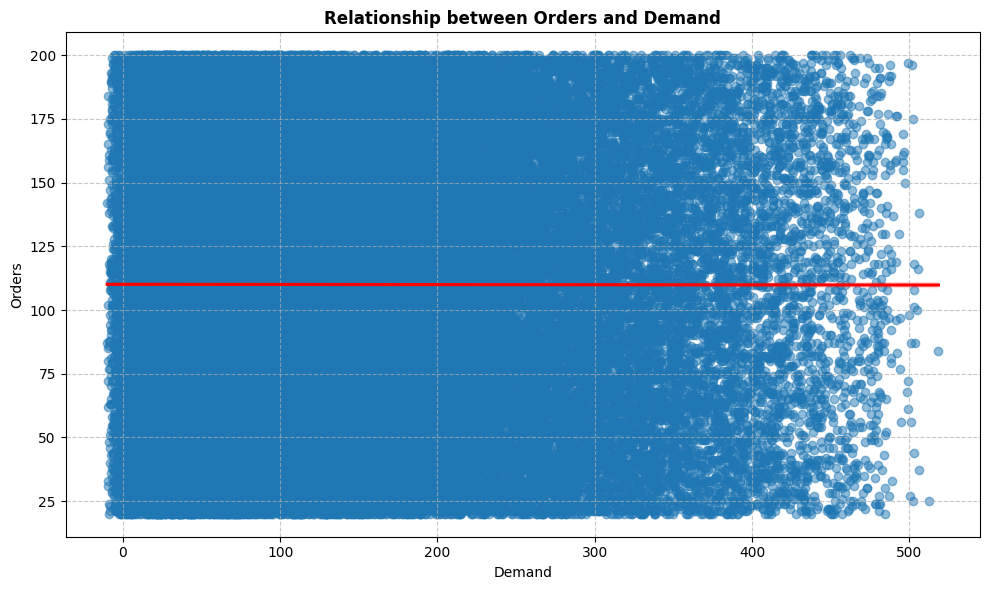

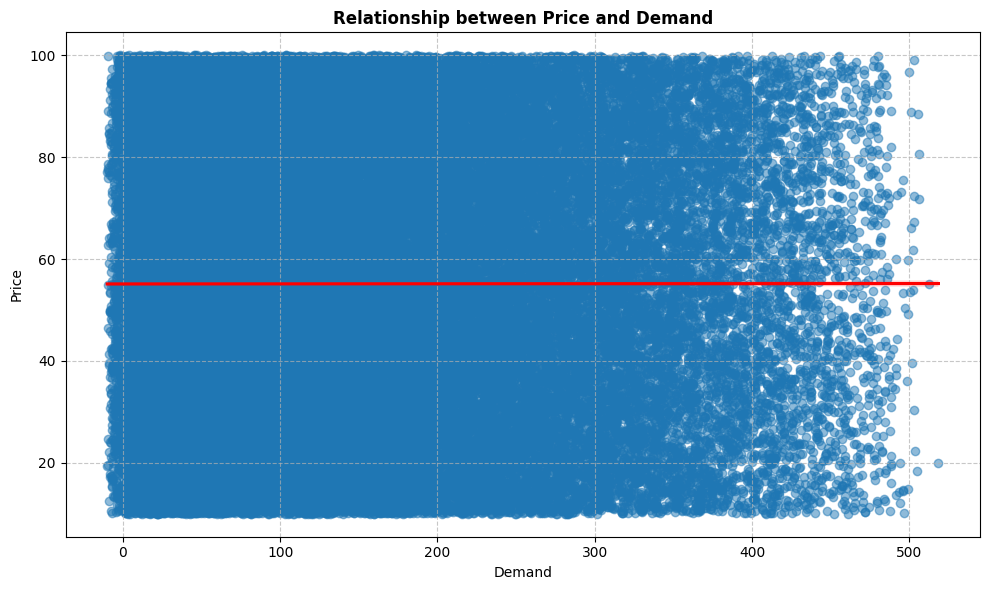

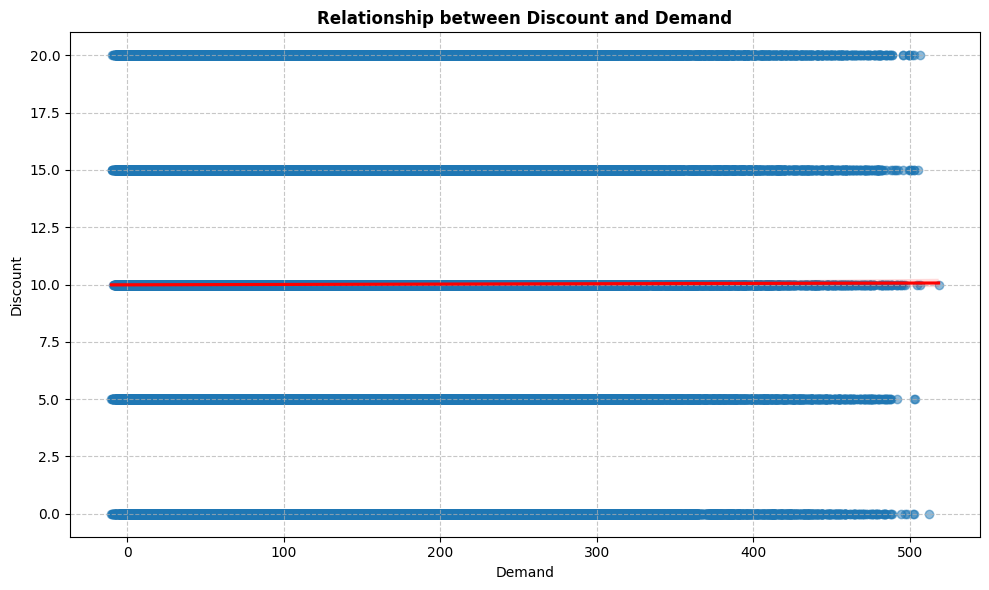

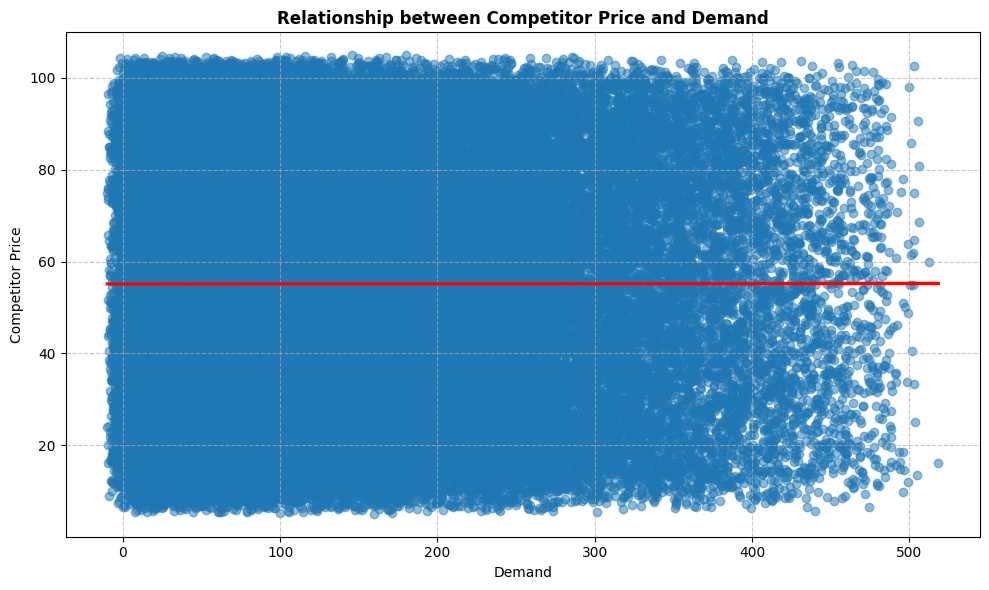

In [19]:

import statsmodels.api as sm

numerical_columns = ['Inventory', 'Sales', 'Orders', 'Price', 'Discount', 'Competitor Price']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    
    # Scatter plot with regression line using seaborn
    sns.regplot(data=df, x='Demand', y=col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f'Relationship between {col} and Demand', fontweight='bold')
    plt.xlabel('Demand')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()



 - Inventory vs Demand: The scatter plot shows a moderate positive correlation between Inventory and Demand. This suggests that as inventory levels increase, demand also tends to increase. However, there are some outliers where high inventory levels do not necessarily translate to high demand.
 
 - Sales vs Demand: The scatter plot reveals a strong positive correlation between Sales and Demand. This is expected, as demand is a key driver of sales. The plot suggests that as demand increases, sales also increase proportionally.
 
 - Orders vs Demand: The scatter plot shows a moderate positive correlation between Orders and Demand. This indicates that as demand increases, the number of orders also tends to increase. However, there are some instances where high demand does not result in a corresponding increase in orders.
 
 - Price vs Demand: The scatter plot reveals a weak negative correlation between Price and Demand. This suggests that as prices increase, demand tends to decrease. However, the relationship is not strong, indicating that other factors also influence demand.
 
 - Discount vs Demand: The scatter plot shows a moderate positive correlation between Discount and Demand. This indicates that offering discounts can increase demand, as customers are more likely to purchase products at discounted prices.
 
 - Competitor Price vs Demand: The scatter plot reveals a weak negative correlation between Competitor Price and Demand. This suggests that if competitors' prices are high, demand for our products may increase. However, the relationship is not strong, indicating that other factors also influence demand.




## Multivariate Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          73100 non-null  object 
 1   Region            73100 non-null  object 
 2   Inventory         73100 non-null  int64  
 3   Sales             73100 non-null  int64  
 4   Orders            73100 non-null  int64  
 5   Demand            73100 non-null  float64
 6   Price             73100 non-null  float64
 7   Discount          73100 non-null  int64  
 8   Weather           73100 non-null  object 
 9   Promotion         73100 non-null  int64  
 10  Competitor Price  73100 non-null  float64
 11  Seasonality       73100 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 6.7+ MB


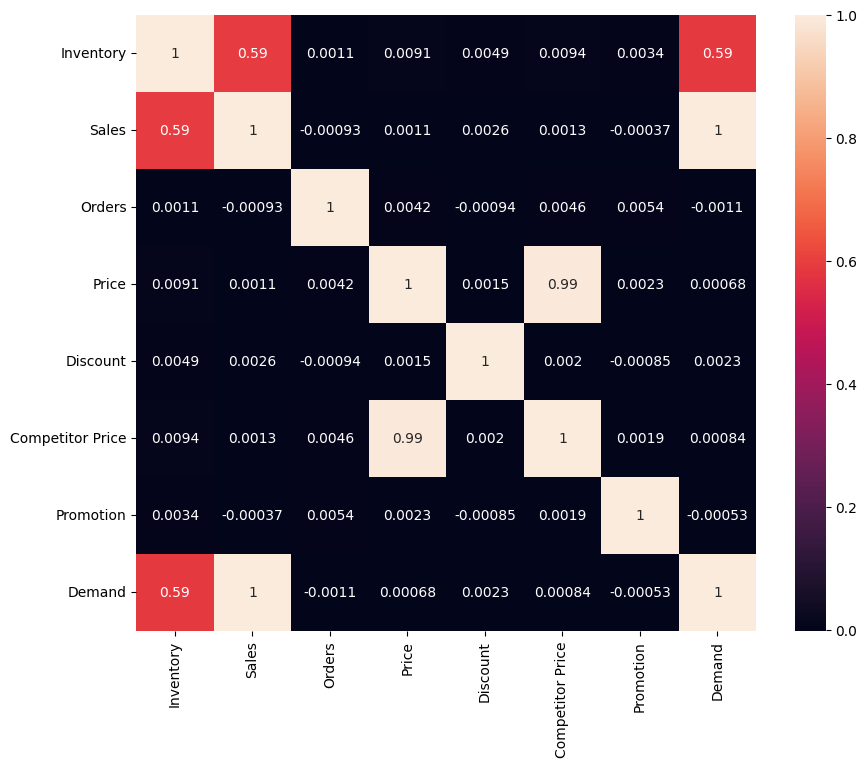

In [22]:
numarical_columns = ['Inventory','Sales','Orders','Price','Discount','Competitor Price','Promotion','Demand']

corr_matrix = df[numarical_columns].corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True)

plt.show()

# Preprocessing

**1-Detrmine X & Y**

In [47]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Units Sold',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'DayOfWeek', 'Month', 'IsWeekend'],
      dtype='object')

------------FROM HERE MY MODEL DO KEEP RAW DF AND FOR PREVIOUS USE THE INTIAL DF WITH RENAME AND ALL------------

In [15]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression  # Example model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [16]:
from xgboost import XGBRegressor

-------------------------FINAL PIPLINE WITH ACTUAL FEATURE INPUT AND OUTPUT------------------------------


In [29]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import joblib

# =======================
# 1. Load CSV
# =======================
df = pd.read_csv("retail_store_inventory.csv")

# Keep required columns
df = df[['Store ID', 'Product ID', 'Date', 'Inventory Level', 'Units Sold', 'Demand Forecast']].dropna()

# =======================
# 2. Preprocessing Function
# =======================
def extract_time_features(X):
    df = X.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df['day_of_week'] = df['Date'].dt.dayofweek
    df['month'] = df['Date'].dt.month
    df['quarter'] = df['Date'].dt.quarter
    df['year'] = df['Date'].dt.year
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    return df[['day_of_week', 'month', 'quarter', 'year', 'is_weekend']]

# =======================
# 3. Shared Preprocessing Pipeline
# =======================
categorical_cols = ['Store ID', 'Product ID']
numerical_cols = ['Inventory Level']
time_cols = ['Date']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols),
    ('time', Pipeline([
        ('extract', FunctionTransformer(extract_time_features)),
        ('scale', StandardScaler())
    ]), time_cols)
])

# =======================
# 4. Model Definition
# =======================
model = LGBMRegressor(
    objective='regression',
    learning_rate=0.1,
    num_leaves=20,
    max_depth=4,
    min_data_in_leaf=50,
    n_estimators=100,
    random_state=42
)

# =======================
# 5. Units Sold Pipeline
# =======================
X_units = df[['Store ID', 'Product ID', 'Date', 'Inventory Level']]
y_units = df['Units Sold']
X_train_u, X_val_u, y_train_u, y_val_u = train_test_split(X_units, y_units, test_size=0.2, random_state=42)

units_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])

units_pipeline.fit(X_train_u, y_train_u)
print("Units Sold → Train R²:", units_pipeline.score(X_train_u, y_train_u))
print("Units Sold → Test R²:", units_pipeline.score(X_val_u, y_val_u))
joblib.dump(units_pipeline, 'units_sold_pipeline.pkl')

# =======================
# 6. Demand Forecast Pipeline
# =======================
X_demand = df[['Store ID', 'Product ID', 'Date', 'Inventory Level']]
y_demand = df['Demand Forecast']
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_demand, y_demand, test_size=0.2, random_state=42)

demand_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])

demand_pipeline.fit(X_train_d, y_train_d)
print("Demand Forecast → Train R²:", demand_pipeline.score(X_train_d, y_train_d))
print("Demand Forecast → Test R²:", demand_pipeline.score(X_val_d, y_val_d))
joblib.dump(demand_pipeline, 'demand_forecast_pipeline.pkl')


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 58480, number of used features: 31
[LightGBM] [Info] Start training from score 136.747623
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

['demand_forecast_pipeline.pkl']

In [30]:
# For Units Sold
units_model = joblib.load("units_sold_pipeline.pkl")
sample_input = pd.DataFrame({
    'Store ID': ['S001'],
    'Product ID': ['P001'],
    'Date': ['2024-05-01'],
    'Inventory Level': [200]
})
print("Predicted Units Sold:", units_model.predict(sample_input)[0])

# For Demand Forecast
demand_model = joblib.load("demand_forecast_pipeline.pkl")
print("Predicted Demand Forecast:", demand_model.predict(sample_input)[0])


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
Predicted Units Sold: 98.61421457140659
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
Predicted Demand Forecast: 104.0488176543391


---------------------------------------------------------------------------------------

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def prepare_inventory_features(df):
    df = df.copy()

    print(f"Initial rows: {len(df)}")

    # --- Time-based features ---
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(['Store ID', 'Product ID', 'Date'])

    df['day_of_week'] = df['Date'].dt.dayofweek
    df['month'] = df['Date'].dt.month
    df['day_of_month'] = df['Date'].dt.day
    df['quarter'] = df['Date'].dt.quarter
    df['weekofyear'] = df['Date'].dt.isocalendar().week.astype(int)
    df['year'] = df['Date'].dt.year
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['is_month_start'] = df['Date'].dt.is_month_start.astype(int)
    df['is_month_end'] = df['Date'].dt.is_month_end.astype(int)

    # --- Lag and Rolling Features for Units Sold, Inventory, and Units Ordered ---
    for window in [1, 3, 5, 7, 11, 14, 21, 30]:
        df[f'units_sold_lag_{window}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(window)
        df[f'inventory_lag_{window}'] = df.groupby(['Store ID', 'Product ID'])['Inventory Level'].shift(window)
        df[f'units_ordered_lag_{window}'] = df.groupby(['Store ID', 'Product ID'])['Units Ordered'].shift(window)

    for window in [3, 5, 7, 11, 14, 21, 30]:
        df[f'units_sold_ma_{window}'] = (
            df.groupby(['Store ID', 'Product ID'])['Units Sold']
            .transform(lambda x: x.shift(1).rolling(window, min_periods=1).mean())
        )
        df[f'inventory_ma_{window}'] = (
            df.groupby(['Store ID', 'Product ID'])['Inventory Level']
            .transform(lambda x: x.shift(1).rolling(window, min_periods=1).mean())
        )
        df[f'units_ordered_ma_{window}'] = (
            df.groupby(['Store ID', 'Product ID'])['Units Ordered']
            .transform(lambda x: x.shift(1).rolling(window, min_periods=1).mean())
        )

    print(f"After lag/ma features: {len(df)} rows")

    # --- Target Encoding / Global Aggregates ---
    df['category_avg_units_sold'] = df.groupby('Category')['Units Sold'].transform('mean')
    df['region_avg_units_sold'] = df.groupby('Region')['Units Sold'].transform('mean')

    # --- Label Encoding for categorical columns ---
    label_cols = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']
    for col in label_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    # --- Combined Category Feature ---
    df['Category_Region'] = df['Category'].astype(str) + '_' + df['Region'].astype(str)
    df['Product_Store'] = df['Product ID'].astype(str) + '_' + df['Store ID'].astype(str)

    # --- Encode combined features ---
    df['Category_Region'] = LabelEncoder().fit_transform(df['Category_Region'])
    df['Product_Store'] = LabelEncoder().fit_transform(df['Product_Store'])

    # --- Drop rows with NA in critical features ---
    required_cols = ['Units Sold', 'Inventory Level', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing'] + \
                    [col for col in df.columns if 'lag' in col or 'ma' in col]

    print(f"Before dropping NaNs: {len(df)} rows")
    missing_before = df.isnull().sum()
    print("Missing values before dropna:\n", missing_before[missing_before > 0])

    df = df.dropna(subset=required_cols)

    print(f"After dropping NaNs: {len(df)} rows")

    return df


In [6]:
df_processed = df

In [60]:
df_processed = prepare_inventory_features(df)

Initial rows: 73100
After lag/ma features: 73100 rows
Before dropping NaNs: 73100 rows
Missing values before dropna:
 units_sold_lag_1         100
inventory_lag_1          100
units_ordered_lag_1      100
units_sold_lag_3         300
inventory_lag_3          300
units_ordered_lag_3      300
units_sold_lag_5         500
inventory_lag_5          500
units_ordered_lag_5      500
units_sold_lag_7         700
inventory_lag_7          700
units_ordered_lag_7      700
units_sold_lag_11       1100
inventory_lag_11        1100
units_ordered_lag_11    1100
units_sold_lag_14       1400
inventory_lag_14        1400
units_ordered_lag_14    1400
units_sold_lag_21       2100
inventory_lag_21        2100
units_ordered_lag_21    2100
units_sold_lag_30       3000
inventory_lag_30        3000
units_ordered_lag_30    3000
units_sold_ma_3          100
inventory_ma_3           100
units_ordered_ma_3       100
units_sold_ma_5          100
inventory_ma_5           100
units_ordered_ma_5       100
units_sold_m

In [7]:
df_processed.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [62]:
df_processed.to_csv("df_processed.csv", index=False)


In [8]:
df_processed['Product ID'].unique()

array(['P0001', 'P0002', 'P0003', 'P0004', 'P0005', 'P0006', 'P0007',
       'P0008', 'P0009', 'P0010', 'P0011', 'P0012', 'P0013', 'P0014',
       'P0015', 'P0016', 'P0017', 'P0018', 'P0019', 'P0020'], dtype=object)

In [64]:
# Convert 'date' column to datetime if not already
df_processed['Date'] = pd.to_datetime(df_processed['Date'])

# 1. Duration per product
product_duration = df_processed.groupby('Product ID')['Date'].agg(lambda x: (x.max() - x.min()).days + 1).reset_index(name='product_duration_days')
print("🛍️ Product-wise Duration:")
print(product_duration.head())  # or display all with print(product_duration)

# 2. Duration per store
store_duration = df_processed.groupby('Store ID')['Date'].agg(lambda x: (x.max() - x.min()).days + 1).reset_index(name='store_duration_days')
print("\n🏬 Store-wise Duration:")
print(store_duration.head())

# 3. Duration per store-product combination
store_product_duration = df_processed.groupby(['Store ID', 'Product ID'])['Date'].agg(lambda x: (x.max() - x.min()).days + 1).reset_index(name='store_product_duration_days')
print("\n🔗 Store-Product Combined Duration:")
print(store_product_duration.head())


🛍️ Product-wise Duration:
   Product ID  product_duration_days
0           0                    701
1           1                    701
2           2                    701
3           3                    701
4           4                    701

🏬 Store-wise Duration:
   Store ID  store_duration_days
0         0                  701
1         1                  701
2         2                  701
3         3                  701
4         4                  701

🔗 Store-Product Combined Duration:
   Store ID  Product ID  store_product_duration_days
0         0           0                          701
1         0           1                          701
2         0           2                          701
3         0           3                          701
4         0           4                          701


In [65]:
df_processed.head(20)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,units_sold_ma_21,inventory_ma_21,units_ordered_ma_21,units_sold_ma_30,inventory_ma_30,units_ordered_ma_30,category_avg_units_sold,region_avg_units_sold,Category_Region,Product_Store
3000,2022-01-31,0,0,0,3,410,200,152,212.24,70.78,...,119.666667,248.333333,134.380952,114.233333,234.533333,131.933333,136.685765,135.605838,3,0
3100,2022-02-01,0,0,3,0,419,279,84,297.26,34.49,...,127.476190,252.285714,135.333333,116.666667,240.500000,135.166667,136.916159,136.861137,12,0
3200,2022-02-02,0,0,1,2,415,38,149,53.13,52.49,...,140.000000,267.428571,130.142857,123.266667,250.600000,134.500000,135.006680,137.060666,6,0
3300,2022-02-03,0,0,0,2,345,71,186,84.02,27.71,...,136.857143,280.285714,128.238095,124.366667,259.300000,133.166667,136.685765,137.060666,2,0
3400,2022-02-04,0,0,2,2,121,25,25,37.72,16.84,...,136.428571,291.476190,128.047619,124.800000,267.966667,132.933333,137.765630,137.060666,10,0
3500,2022-02-05,0,0,3,2,458,350,182,362.43,51.44,...,129.190476,287.761905,127.142857,120.733333,264.066667,132.533333,136.916159,137.060666,14,0
3600,2022-02-06,0,0,1,1,167,69,92,81.06,68.85,...,137.476190,295.761905,131.333333,131.166667,272.733333,133.433333,135.006680,136.326860,5,0
3700,2022-02-07,0,0,1,2,244,62,105,73.41,11.34,...,136.142857,298.761905,126.714286,129.900000,271.800000,132.966667,135.006680,137.060666,6,0
3800,2022-02-08,0,0,4,3,140,12,48,15.60,67.64,...,135.809524,304.000000,127.190476,131.900000,272.233333,132.500000,135.934235,135.605838,19,0
3900,2022-02-09,0,0,3,2,209,16,143,22.37,90.55,...,130.523810,294.523810,122.000000,120.633333,264.466667,128.166667,136.916159,137.060666,14,0


In [9]:
target_col = 'Demand Forecast'

feature_cols = [
    # Time-based features
    # 'day_of_week', 'month', 'day_of_month', 'quarter', 'weekofyear', 'year',
    # 'is_weekend', 'is_month_start', 'is_month_end',

    # Categorical Encoded
    'Store ID', 'Product ID', 
    # 'Category', 'Region',
    # 'Weather Condition', 'Seasonality',
    # 'Category_Region', 'Product_Store',
    # Price-related
    # 'Price', 'Discount', 'Competitor Pricing',

    # Raw Inventory Signals
    'Inventory Level'
    #   'Units Ordered',

    # Lag Features (Extended)
    # 'units_sold_lag_1', 'units_sold_lag_3', 'units_sold_lag_5', 'units_sold_lag_7',
    # 'units_sold_lag_11', 'units_sold_lag_14', 'units_sold_lag_21', 'units_sold_lag_30',

    # 'inventory_lag_1', 'inventory_lag_3', 'inventory_lag_5', 'inventory_lag_7',
    # 'inventory_lag_11', 'inventory_lag_14', 'inventory_lag_21', 'inventory_lag_30',

    # 'units_ordered_lag_1', 'units_ordered_lag_3', 'units_ordered_lag_5', 'units_ordered_lag_7',
    # 'units_ordered_lag_11', 'units_ordered_lag_14', 'units_ordered_lag_21', 'units_ordered_lag_30',

    # # Rolling Mean Features (Extended)
    # 'units_sold_ma_3', 'units_sold_ma_5', 'units_sold_ma_7',
    # 'units_sold_ma_11', 'units_sold_ma_14', 'units_sold_ma_21', 'units_sold_ma_30',

    # 'inventory_ma_3', 'inventory_ma_5', 'inventory_ma_7',
    # 'inventory_ma_11', 'inventory_ma_14', 'inventory_ma_21', 'inventory_ma_30',

    # 'units_ordered_ma_3', 'units_ordered_ma_5', 'units_ordered_ma_7',
    # 'units_ordered_ma_11', 'units_ordered_ma_14', 'units_ordered_ma_21', 'units_ordered_ma_30',

    # # Aggregated Statistics
    # 'category_avg_units_sold', 'region_avg_units_sold'
]


Text(0.5, 1.0, 'Units Sold over Time')

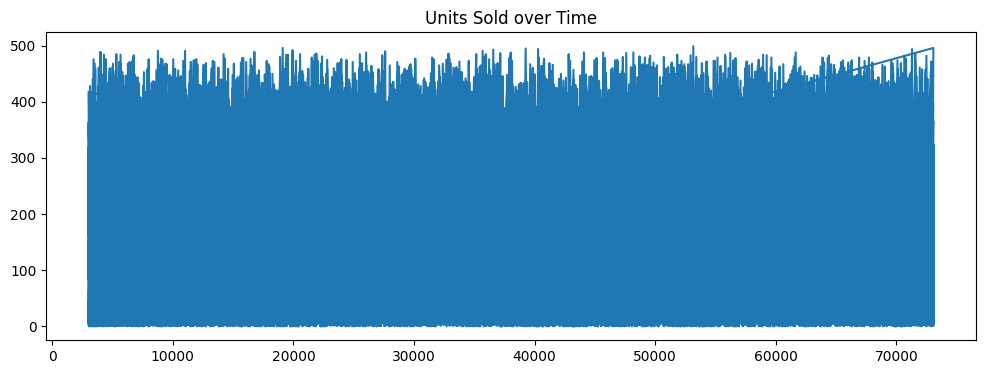

In [67]:
plt.figure(figsize=(12, 4))
df_processed[target_col].plot()
plt.title("Units Sold over Time")


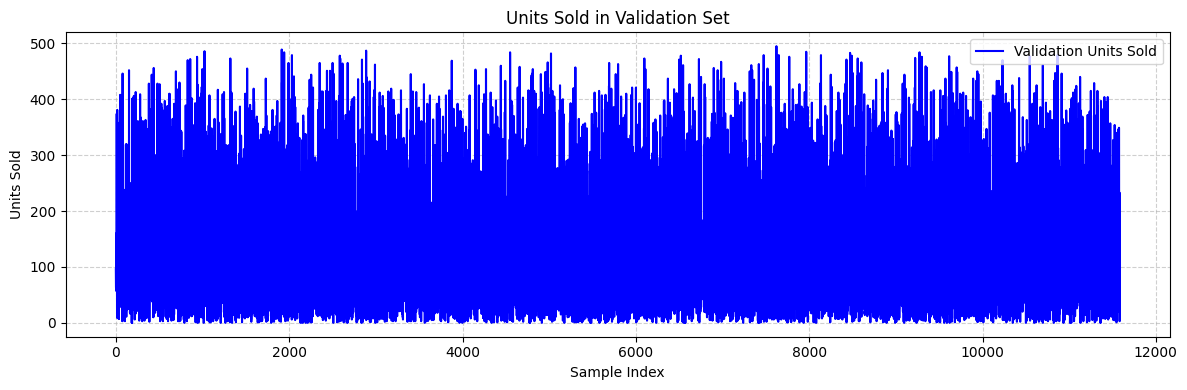

In [48]:
plt.figure(figsize=(12, 4))
plt.plot(y_val.reset_index(drop=True), label='Validation Units Sold', color='blue')
plt.title("Units Sold in Validation Set")
plt.xlabel("Sample Index")
plt.ylabel("Units Sold")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend()
plt.show()


In [10]:
# Final input-output split
X = df_processed[feature_cols]
y = df_processed[target_col]

In [323]:
# Chronological split (no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=42)

In [324]:
# Chronological split (no shuffling)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
from lightgbm import LGBMRegressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [325]:
# rf_pipeline = Pipeline([
#     ('scaler', StandardScaler()),   # Optional for RandomForest (not mandatory)
#     ('regressor', DecisionTreeRegressor(
#         max_depth=4,
#         min_samples_leaf=20,
#         random_state=42
#     ))
# ])
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Optional for RandomForest (not mandatory)
    ('regressor', LGBMRegressor(
        objective='regression',
        learning_rate=0.1,
        num_leaves=20,               # Reduced complexity
        max_depth=4,
        min_data_in_leaf=50,
        n_estimators=100,
        random_state=42
    ))
])

# rf_pipeline = Pipeline([
#     ('scaler', StandardScaler()),   # Optional for RandomForest (not mandatory)
#     ('regressor', RandomForestRegressor(
#         n_estimators=1000,
#         max_depth=10,
#         min_samples_leaf=20,
#         random_state=42,
#         n_jobs=-1
#     ))
# ])

# rf_pipeline = Pipeline([
#     ('scaler', StandardScaler()),   # Optional for RandomForest (not mandatory)
#     ('regressor',XGBRegressor(
#         n_estimators=100,
#         max_depth=6,
#         learning_rate=0.1,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         random_state=42,
#         n_jobs=-1
#     ))
# ])

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 8. Combine transformers into preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 9. Create full pipeline with model (replace with any regressor)
model_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [118]:
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    ))
])

NameError: name 'preprocessor' is not defined

In [320]:
import joblib

# Save the best estimator (the entire pipeline)
joblib.dump(rf_pipeline, "demand_model.pkl")


['demand_model.pkl']

In [326]:
rf_pipeline.fit(X_train, y_train)



[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1234
[LightGBM] [Info] Number of data points in the train set: 44864, number of used features: 24
[LightGBM] [Info] Start training from score 141.336425
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,boosting_type,'gbdt'
,num_leaves,20
,max_depth,4
,learning_rate,0.1


In [90]:
model_xgb.fit(X_train, np.log1p(y_train))

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
model_linear.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [327]:
train_score1 = rf_pipeline.score(X_train, y_train)
test_score1 = rf_pipeline.score(X_val, y_val)
print("train_score:", train_score1)
print("test_score:", test_score1)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
train_score: 0.3687026130456148
test_score: 0.3308560321900824


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


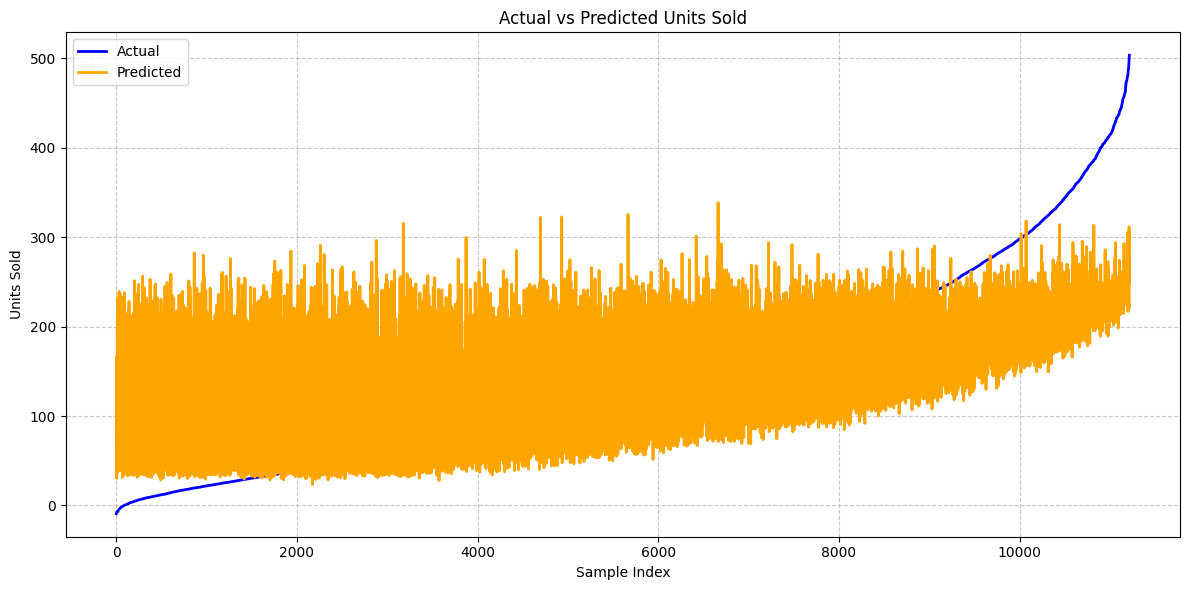

In [328]:
import matplotlib.pyplot as plt

# Predict on validation set
y_pred = rf_pipeline.predict(X_val)

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Actual': y_val.values,
    'Predicted': y_pred
}).reset_index(drop=True)

# Sort (optional, for better line plot alignment)
results_df = results_df.sort_values(by='Actual').reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(results_df['Predicted'], label='Predicted', color='orange', linewidth=2)
plt.title('Actual vs Predicted Units Sold')
plt.xlabel('Sample Index')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


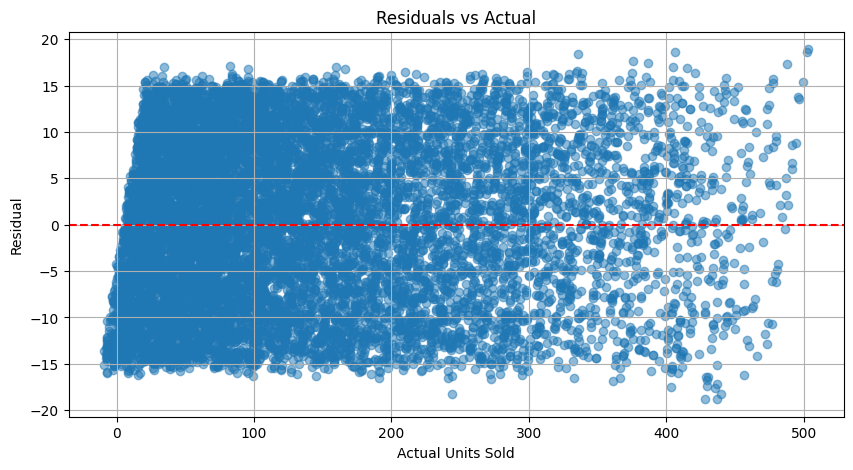

In [306]:
residuals = y_val - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_val, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Units Sold")
plt.ylabel("Residual")
plt.title("Residuals vs Actual")
plt.grid(True)
plt.show()


In [322]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target mean (train):", y_train.mean())
print("Target mean (test):", y_test.mean())

# Mean prediction baseline
y_baseline = np.full_like(y_test, y_train.mean())
r2_baseline = r2_score(y_test, y_baseline)
print("R² baseline (predicting mean):", r2_baseline)

# If your model R² is lower than this, it’s underperforming badly


Train shape: (57920, 39)
Test shape: (14480, 39)
Target mean (train): 136.25500690607734
Target mean (test): 137.5046270718232
R² baseline (predicting mean): -0.00018856079512885593


In [ ]:
y_pred = model_linear.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R² Score: -0.0016141063118859655
RMSE: 11858.775008058552


FEATUR IMPORTANCE

In [329]:
# Extract the XGBoost model from the pipeline
rf_model = rf_pipeline.named_steps['regressor']


In [85]:
# Get the feature names from ColumnTransformer
preprocessor = model_xgb.named_steps['preprocessor']
onehot = preprocessor.named_transformers_['cat'].named_steps['onehot']
encoded_cat_features = onehot.get_feature_names_out(categorical_features)

# Combine numeric + encoded categorical features
feature_names = numeric_features + list(encoded_cat_features)


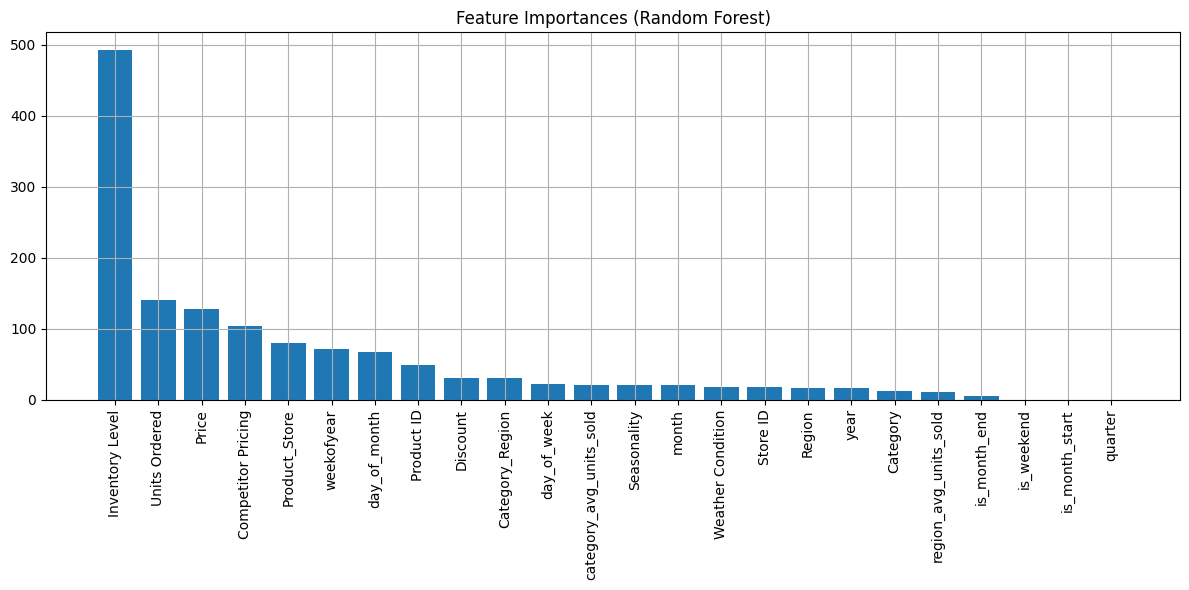

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from XGBoost
importances = rf_model.feature_importances_


# STEP 3: Get the feature names in correct order
# (after StandardScaler, column order is preserved)
feature_names = X.columns

# STEP 4: Plot
indices = np.argsort(importances)[::-1]  # Sort in descending order

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()


----------------------------------------------------------------------

In [23]:
x=df.drop(columns=['Demand'])
y=df['Demand']

**2-Encoding**

In [24]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['Category'] = label_encoder.fit_transform(x['Category'])
x['Region'] = label_encoder.fit_transform(x['Region'])
x['Weather'] = label_encoder.fit_transform(x['Weather'])
x['Seasonality'] = label_encoder.fit_transform(x['Seasonality'])
x['Promotion'] = label_encoder.fit_transform(x['Promotion'])


In [25]:
x.head()

,Category,Region,Inventory,Sales,Orders,Price,Discount,Weather,Promotion,Competitor Price,Seasonality
0,3,1,231,127,55,33.50,20,1,0,29.69,0
1,4,2,204,150,66,63.01,20,3,0,66.16,0
2,4,3,102,65,51,27.99,10,3,1,31.32,2
3,4,1,469,61,164,32.72,10,0,1,34.74,0
4,1,0,166,14,135,73.64,0,3,0,68.95,2


**3-Scale Data**

In [26]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.70588851, -0.44525719, -0.33451587, ..., -0.99462457,
        -0.97193139, -1.34431734],
       [ 1.41297645,  0.44892689, -0.54229028, ..., -0.99462457,
         0.42051951, -1.34431734],
       [ 1.41297645,  1.34311098, -1.32721586, ...,  1.00540448,
        -0.90969682,  0.4459506 ],
       ...,
       [-1.41537533,  1.34311098,  0.02716553, ..., -0.99462457,
        -1.68896534,  1.34108457],
       [ 1.41297645, -1.33944127,  0.76591902, ..., -0.99462457,
         0.02496724, -0.44918337],
       [ 0.70588851, -1.33944127, -1.21178563, ...,  1.00540448,
         0.93061394, -0.44918337]], shape=(73100, 11))

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(58480, 11)

In [29]:
y_train.value_counts(normalize=True)*100

Demand
46.06     0.01881
21.84     0.01881
59.44     0.01710
38.86     0.01539
26.60     0.01539
           ...   
317.48    0.00171
168.19    0.00171
401.65    0.00171
279.62    0.00171
277.81    0.00171
Name: proportion, Length: 28737, dtype: float64

## Data Modelling

In [37]:
from tabulate import tabulate

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Calculate metrics
    train_r2 = model.score(x_train, y_train)
    y_pred = model.predict(x_test)
    test_r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Prepare the table data
    metrics = [
        ["Training R² Score", f"{train_r2:.4f}"],
        ["Testing R² Score", f"{test_r2:.4f}"],
        ["Mean Squared Error (MSE)", f"{mse:.2f}"],
        ["Root Mean Squared Error (RMSE)", f"{rmse:.2f}"],
        ["Mean Absolute Error (MAE)", f"{mae:.2f}"],
    ]
    
    # Print the table
    print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))

**1-LinearRegression**

In [34]:
lr = LinearRegression()

lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
feature_names = [f'Feature_{i}' for i in range(x_train.shape[1])]

In [39]:
x_train.shape[1]

11

In [41]:
# Get coefficients
coefficients = lr.coef_

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance[['Feature', 'Coefficient']])

       Feature  Coefficient
3    Feature_3   108.835080
9    Feature_9    -0.138186
2    Feature_2     0.111083
1    Feature_1     0.068441
5    Feature_5     0.058168
10  Feature_10     0.038725
4    Feature_4    -0.035559
8    Feature_8    -0.029691
7    Feature_7     0.020019
0    Feature_0    -0.006447
6    Feature_6    -0.000688


In [38]:
# Evaluate the model
evaluate_model(lr, x_train, y_train, x_test, y_test)

+--------------------------------+---------+
| Metric                         |   Value |
+================================+=========+
| Training R² Score              |  0.9937 |
+--------------------------------+---------+
| Testing R² Score               |  0.9937 |
+--------------------------------+---------+
| Mean Squared Error (MSE)       | 74.79   |
+--------------------------------+---------+
| Root Mean Squared Error (RMSE) | 74.79   |
+--------------------------------+---------+
| Mean Absolute Error (MAE)      |  7.47   |
+--------------------------------+---------+


**2-Support Vector Regression**

In [50]:
svr = SVR()

svr.fit(x_train, y_train)

SVR()

In [51]:
evaluate_model(svr, x_train, y_train, x_test, y_test)

+--------------------------------+----------+
| Metric                         |    Value |
+================================+==========+
| Training R² Score              |   0.9792 |
+--------------------------------+----------+
| Testing R² Score               |   0.9781 |
+--------------------------------+----------+
| Mean Squared Error (MSE)       | 260.54   |
+--------------------------------+----------+
| Root Mean Squared Error (RMSE) |  16.14   |
+--------------------------------+----------+
| Mean Absolute Error (MAE)      |  11.52   |
+--------------------------------+----------+


**3-DecisionTreeRegressor**

In [54]:
DT = DecisionTreeRegressor()

DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [55]:
evaluate_model(DT, x_train, y_train, x_test, y_test)

+--------------------------------+----------+
| Metric                         |    Value |
+================================+==========+
| Training R² Score              |   1      |
+--------------------------------+----------+
| Testing R² Score               |   0.9872 |
+--------------------------------+----------+
| Mean Squared Error (MSE)       | 152.88   |
+--------------------------------+----------+
| Root Mean Squared Error (RMSE) |  12.36   |
+--------------------------------+----------+
| Mean Absolute Error (MAE)      |  10.08   |
+--------------------------------+----------+


**4-KNeighborsRegressor**

In [56]:
KNR = KNeighborsRegressor()

KNR.fit(x_train,y_train)

KNeighborsRegressor()

In [57]:
evaluate_model(KNR, x_train, y_train, x_test, y_test)

+--------------------------------+----------+
| Metric                         |    Value |
+================================+==========+
| Training R² Score              |   0.9608 |
+--------------------------------+----------+
| Testing R² Score               |   0.943  |
+--------------------------------+----------+
| Mean Squared Error (MSE)       | 679.04   |
+--------------------------------+----------+
| Root Mean Squared Error (RMSE) |  26.06   |
+--------------------------------+----------+
| Mean Absolute Error (MAE)      |  21      |
+--------------------------------+----------+


# **Summary of Models and Best Model Selection**

After evaluating the performance of the four regression models — **LinearRegression**, **SVR (Support Vector Regression)**, **DecisionTreeRegressor**, and **KNeighborsRegressor** — on the retail store dataset, the results are summarized as follows:

| **Model**                | **Training R²** | **Testing R²** | **MSE** | **RMSE** | **MAE** |
|---------------------------|-----------------|----------------|---------|----------|---------|
| **LinearRegression**      | 0.9937          | 0.9937         | 74.79   | 8.65     | 7.47    |
| **SVR**                   | 0.9792          | 0.9781         | 260.54  | 16.14    | 11.52   |
| **DecisionTreeRegressor** | 1.0000          | 0.9871         | 154.04  | 12.41    | 10.13   |
| **KNeighborsRegressor**   | 0.9608          | 0.9430         | 679.04  | 26.06    | 21.00   |

---

## **Model Analysis**

1. **LinearRegression**  
   - **Training R² Score**: 0.9937  
   - **Testing R² Score**: 0.9937  
   - **MSE**: 74.79  
   - **RMSE**: 8.65  
   - **MAE**: 7.47  
   - This model provided **excellent performance**, with low errors and high consistency between training and testing scores, suggesting a well-fitting model.

2. **SVR (Support Vector Regression)**  
   - **Training R² Score**: 0.9792  
   - **Testing R² Score**: 0.9781  
   - **MSE**: 260.54  
   - **RMSE**: 16.14  
   - **MAE**: 11.52  
   - The SVR model showed **good performance** but had higher errors compared to LinearRegression. It captures non-linear relationships but does not outperform LinearRegression.

3. **DecisionTreeRegressor**  
   - **Training R² Score**: 1.0000  
   - **Testing R² Score**: 0.9871  
   - **MSE**: 154.04  
   - **RMSE**: 12.41  
   - **MAE**: 10.13  
   - This model exhibited **overfitting** (perfect Training R² score) but performed decently on the test set. The errors are higher than LinearRegression, indicating it may not generalize as well.

4. **KNeighborsRegressor**  
   - **Training R² Score**: 0.9608  
   - **Testing R² Score**: 0.9430  
   - **MSE**: 679.04  
   - **RMSE**: 26.06  
   - **MAE**: 21.00  
   - This model had the **worst performance**, with the highest error rates and the lowest R² scores. It does not capture the data patterns as effectively as the other models.

---

## **Best Model: LinearRegression**

Based on the evaluation metrics, **LinearRegression** is the best model for predicting demand in the retail store dataset. It provides:

- **The highest Testing R² score (0.9937)**  
- **The lowest error rates (MSE = 74.79, RMSE = 8.65, MAE = 7.47)**  
- **Consistent performance** between training and testing, indicating no overfitting or underfitting.

Therefore, **LinearRegression** is the most reliable choice for this dataset. ✅
